<center> <font size=6> <b> Table of Contents </b> </font> </center> 
<div id="toc"></div>

The following cell is a Javascript section of code for building the Jupyter notebook's table of content.

In [5]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define working environment</h1> </font> </center> 

The following cells are used to: 
- Import needed libraries
- Set the environment variables for Python, Anaconda, GRASS GIS and R statistical computing 
- Define the ["GRASSDATA" folder](https://grass.osgeo.org/grass73/manuals/helptext.html), the name of "location" and "mapset" where you will to work.

**Import libraries**

In [6]:
## Import libraries needed for setting parameters of operating system 
import os
import sys

## Import library for temporary files creation 
import tempfile 

## Import Pandas library
import pandas as pd

## Import Numpy library
import numpy

## Import Psycopg2 library (interection with postgres database)
import psycopg2 as pg

# Import Math library (usefull for rounding number, e.g.)
import math

## Import Subprocess + subprocess.call
import subprocess
from subprocess import call, Popen, PIPE, STDOUT

<center> <font size=3> <h3>Environment variables when working on Linux Mint</h3> </font> </center> 

**Set 'Python' and 'GRASS GIS' environment variables**

Here, we set [the environment variables allowing to use of GRASS GIS](https://grass.osgeo.org/grass64/manuals/variables.html) inside this Jupyter notebook. Please change the directory path according to your own system configuration.

In [7]:
### Define GRASS GIS environment variables for LINUX UBUNTU Mint 18.1 (Serena)
# Check is environmental variables exists and create them (empty) if not exists.
if not 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH']=''
if not 'LD_LIBRARY_PATH' in os.environ:
    os.environ['LD_LIBRARY_PATH']=''
# Set environmental variables
os.environ['GISBASE'] = '/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu'
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'bin')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'script')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'lib')
#os.environ['PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python','grass')
os.environ['PYTHONPATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'etc','python','grass','script')
os.environ['PYTHONLIB'] = '/usr/lib/python2.7'
os.environ['LD_LIBRARY_PATH'] += os.pathsep + os.path.join(os.environ['GISBASE'],'lib')
os.environ['GIS_LOCK'] = '$$'
os.environ['GISRC'] = os.path.join(os.environ['HOME'],'.grass7','rc')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons','bin')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons')
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HOME'],'.grass7','addons','scripts')

## Define GRASS-Python environment
sys.path.append(os.path.join(os.environ['GISBASE'],'etc','python'))

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

**Display current environment variables of your computer**

In [4]:
## Display the current defined environment variables
for key in os.environ.keys():
    print "%s = %s \t" % (key,os.environ[key])

MDMSESSION = mate 	
MANDATORY_PATH = /usr/share/gconf/mate.mandatory.path 	
MATE_DESKTOP_SESSION_ID = this-is-deprecated 	
LESSOPEN = | /usr/bin/lesspipe %s 	
MDM_LANG = fr_BE.UTF-8 	
LOGNAME = tais 	
USER = tais 	
HOME = /home/tais 	
XDG_VTNR = 9 	
PATH = /usr/local/bin:/home/tais/BIN:/home/tais/bin:/home/tais/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/bin:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/script:/home/tais/SRC/GRASS/grass_trunk/dist.x86_64-pc-linux-gnu/lib:/home/tais/.grass7/addons:/home/tais/.grass7/addons/bin:/home/tais/.grass7/addons:/home/tais/.grass7/addons/scripts 	
CLICOLOR = 1 	
DISPLAY = :0.0 	
SSH_AGENT_PID = 18486 	
LANG = fr_BE.UTF-8 	
TERM = xterm-color 	
SHELL = /bin/bash 	
GIS_LOCK = $$ 	
XAUTHORITY = /home/tais/.Xauthority 	
SESSION_MANAGER = local/tais-HP-Z620-Workstation:@/tmp/.ICE-unix/18415,unix/tais-HP-Z620-Workstation:/tmp/.I

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>User inputs</h1> </font> </center> 

In [8]:
## Define a empty dictionnary for saving user inputs
user={}

Here after:
- Enter the path to the directory you want to use as "[GRASSDATA](https://grass.osgeo.org/programming7/loc_struct.png)". 
- Enter the name of the location in which you want to work and its projection information in [EPSG code](http://spatialreference.org/ref/epsg/) format. Please note that the GRASSDATA folder and locations will be automatically created if not existing yet. If the location name already exists, the projection information will not be used.  
- Enter the name you want for the mapsets which will be used later for Unsupervised Segmentation Parameter Optimization (USPO), Segmentation and Classification steps.

In [9]:
## Enter the path to GRASSDATA folder
user["gisdb"] = "/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/GRASSDATA"

## Enter the name of the location (existing or for a new one)
user["location"] = "Ouaga_32630"

## Enter the EPSG code for this location 
user["locationepsg"] = "32630"

## Enter the name of the mapset to use for segmentation
user["segmentation_mapsetname"] = "LOCAL_SEGMENT"

## Enter the name of the mapset to use for classification
user["classificationA_mapsetname"] = "CLASSIF"

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define GRASSDATA folder and create GRASS' location and mapsets</h1> </font> </center> 

Here after, the python script will check if GRASSDATA folder, locations and mapsets already exist. If not, they will be automatically created.

**Import GRASS Python packages**

In [10]:
## Import libraries needed to launch GRASS GIS in the jupyter notebook
import grass.script.setup as gsetup

## Import libraries needed to call GRASS using Python
import grass.script as grass

**Define GRASSDATA folder and create location and mapsets**

In [7]:
## Automatic creation of GRASSDATA folder
if os.path.exists(user["gisdb"]):
    print "GRASSDATA folder already exist" 
else: 
    os.makedirs(user["gisdb"]) 
    print "GRASSDATA folder created in "+user["gisdb"]

GRASSDATA folder already exist


In [8]:
## Automatic creation of GRASS location is doesn't exist
if os.path.exists(os.path.join(user["gisdb"],user["location"])):
    print "Location "+user["location"]+" already exist" 
else : 
    grass.core.create_location(user["gisdb"], user["location"], epsg=user["locationepsg"], overwrite=False)
    print "Location "+user["location"]+" created"

Location Ouaga_32630 already exist


In [9]:
### Automatic creation of GRASS GIS mapsets

## Import library for file copying 
import shutil

mapsetname=user["classificationA_mapsetname"]
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    if not os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname,'WIND')):
        print "WARNING: '"+mapsetname+"' mapset already exist, but a 'WIND' file is missing. Please solve this issue."
    else: print "'"+mapsetname+"' mapset already exist" 
else: 
    os.makedirs(os.path.join(user["gisdb"],user["location"],mapsetname))
    shutil.copy(os.path.join(user["gisdb"],user["location"],'PERMANENT','WIND'),os.path.join(user["gisdb"],user["location"],mapsetname,'WIND'))
    print "'"+mapsetname+"' mapset created in location '"+user["location"]+"'"

'CLASSIF' mapset already exist


In [10]:
### Automatic creation of GRASS GIS mapsets

## Import library for file copying 
import shutil

mapsetname=user["segmentation_mapsetname"]
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    if not os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname,'WIND')):
        print "WARNING: '"+mapsetname+"' mapset already exist, but a 'WIND' file is missing. Please solve this issue."
    else: print "'"+mapsetname+"' mapset already exist" 
else: 
    os.makedirs(os.path.join(user["gisdb"],user["location"],mapsetname))
    shutil.copy(os.path.join(user["gisdb"],user["location"],'PERMANENT','WIND'),os.path.join(user["gisdb"],user["location"],mapsetname,'WIND'))
    print "'"+mapsetname+"' mapset created in location '"+user["location"]+"'"

'LOCAL_SEGMENT' mapset already exist


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Define functions</h1> </font> </center> 

This section of the notebook is dedicated to defining functions which will then be called later in the script. If you want to create your own functions, define them here.

### Function for computing processing time

The "print_processing_time" is used to calculate and display the processing time for various stages of the processing chain. At the beginning of each major step, the current time is stored in a new variable, using [time.time() function](https://docs.python.org/2/library/time.html). At the end of the stage in question, the "print_processing_time" function is called and takes as argument the name of this new variable containing the recorded time at the beginning of the stage, and an output message.

In [8]:
## Import library for managing time in python
import time  

## Function "print_processing_time()" compute processing time and printing it.
# The argument "begintime" wait for a variable containing the begintime (result of time.time()) of the process for which to compute processing time.
# The argument "printmessage" wait for a string format with information about the process. 
def print_processing_time(begintime, printmessage):    
    endtime=time.time()           
    processtime=endtime-begintime
    remainingtime=processtime

    days=int((remainingtime)/86400)
    remainingtime-=(days*86400)
    hours=int((remainingtime)/3600)
    remainingtime-=(hours*3600)
    minutes=int((remainingtime)/60)
    remainingtime-=(minutes*60)
    seconds=round((remainingtime)%60,1)

    if processtime<60:
        finalprintmessage=str(printmessage)+str(seconds)+" seconds"
    elif processtime<3600:
        finalprintmessage=str(printmessage)+str(minutes)+" minutes and "+str(seconds)+" seconds"
    elif processtime<86400:
        finalprintmessage=str(printmessage)+str(hours)+" hours and "+str(minutes)+" minutes and "+str(seconds)+" seconds"
    elif processtime>=86400:
        finalprintmessage=str(printmessage)+str(days)+" days, "+str(hours)+" hours and "+str(minutes)+" minutes and "+str(seconds)+" seconds"
    
    return finalprintmessage

### Function for concatenate individual .csv files and replace unwanted values

In [11]:
## Function which concatenate individual .csv files stored in a folder. 
# 'indir' parameter wait for a string with the path to the repertory to look for individual .csv files
# 'pattern' parameter wait for a string with the pattern of filename to look for (example: "TMP_*.csv")
# 'sep' parameter wait for a string with the delimiter of the .csv file
# 'replacedict' parameter wait for a dictionary containing the unwanted values as keys and the replace string as corresponding value
# 'outputfilename' parameter wait for the name of the outputfile (including extansion but without the complete path)

import os
import glob
import csv

def concat_findreplace(indir,pattern,sep,replacedict,outputfilename):
    # Initialise some variables
    messagetoprint=None
    returnmessage=None
    countdict={}
    for k in replacedict:
        countdict[k]=0
    # Change the working directory
    os.chdir(indir) 
    # Get a list with file in the current directory corresponding to a specific pattern
    fileList=None
    fileList=glob.glob(pattern)
    # Print
    messagetoprint="Going to concatenate "+str(len(fileList))+" .csv files together and replace unwanted values."
    #print (messagetoprint)
    returnmessage=messagetoprint
    # Create a new file 
    outfile=os.path.join(indir, outputfilename)
    writercsvSubset = open(outfile, 'wb')
    writercsv=csv.writer(writercsvSubset,delimiter=sep)
    # Concatenate individuals files and replace unwanted values
    for indivfile in fileList:
        with open(indivfile) as readercsvSubset:
            readercsv=csv.reader(readercsvSubset, delimiter=sep)
            if indivfile!=fileList[0]:
                readercsv.next()
            count=0
            for row in readercsv:
                newline=[]
                for i, x in enumerate(row):
                    if x in replacedict:
                        newline.append(replacedict[x])
                        countdict[x]+=1
                    else:
                        newline.append(row[i])
                writercsv.writerow(newline)
        # Close the current input file
        readercsvSubset.close()
    # Close the outputfile
    writercsvSubset.close()
    # Count number of changes
    countchange=0
    for k in countdict:
        countchange+=countdict[k]
    # Print
    if countchange>0:
        messagetoprint="\n"
        returnmessage+=messagetoprint
        messagetoprint="Values have been changed:"+"\n"
        #print (messagetoprint)
        returnmessage+=messagetoprint
        for k in replacedict:
            if countdict[k]>0:
                messagetoprint=str(countdict[k])+" '"+k+"' value(s) replaced by '"+replacedict[k]+"'\n"
                #print (messagetoprint)
                returnmessage+=messagetoprint
    else:
        messagetoprint="Nothing changed. No unwanted values found !"
        #print (messagetoprint)
        returnmessage+=messagetoprint
    # Return
    return returnmessage[:-1]

### Function for Postgres database vaccum

In [12]:
# Do a VACUUM on the current Postgresql database
def vacuum(db):
    old_isolation_level = db.isolation_level
    db.set_isolation_level(0)
    query = "VACUUM"
    cur.execute(query)
    db.set_isolation_level(old_isolation_level)

### Function for finding duplicated 'cat' in the PostGis table

In [13]:
def find_duplicated_cat():
    # Build a query to drop table if exists
    query="DROP TABLE IF EXISTS "+schema+".duplic_cat"
    # Execute the query 
    cur.execute(query)
    # Make the changes to the database persistent
    db.commit()

    # Build a query to select duplicated 'cat' values
    query="CREATE TABLE "+schema+".duplic_cat AS \
    SELECT cat, min(area) as area_min, max(area) as area_max, count(*) as duplic_nbr \
    FROM "+schema+"."+object_stats_table+" \
    GROUP BY cat HAVING count(*) > 1.0 \
    ORDER BY duplic_nbr, cat"
    # Execute the query 
    cur.execute(query)
    # Make the changes to the database persistent
    db.commit()

    # Build a query to select duplicated 'cat' values
    query="SELECT *\
    FROM "+schema+".duplic_cat"
    # Execute the query
    df=pd.read_sql(query, db)

    ## Create a list with duplicated 'cat' values to be droped
    global cattodrop
    cattodrop=list(df['cat'])

### Function for finding duplicated 'key' in the PostGis table

In [14]:
def find_duplicated_key():
    # Build a query to select 'key_value' of duplicated objects values
    query="SELECT a.key_value, a.cat , a.area, b.area_min \
    FROM (SELECT * FROM "+schema+"."+object_stats_table+" WHERE cat IN ("+"'"+"','".join(cattodrop)+"'"+"))AS a \
    LEFT JOIN "+schema+".duplic_cat AS b ON a.cat = b.cat \
    WHERE  a.area=b.area_min \
    ORDER BY a.cat ASC"
    # Execute the query
    df=pd.read_sql(query, db)

    ## Create a list with 'key_value' of rows to be droped
    global keytodrop
    keytodrop=list(df['key_value'])
    
    # Build a query to drop table if exists
    query="DROP TABLE IF EXISTS "+schema+".duplic_cat"
    # Execute the query 
    cur.execute(query)
    # Make the changes to the database persistent
    db.commit()

### Function for removing the duplicated 'key' in the PostGis table

In [15]:
def remove_duplicated_key():
    # If list of key to drop is not empty
    if len(keytodrop)>0:
        # Build a query to delete specific rows
        query="DELETE FROM "+schema+"."+object_stats_table+" \
        WHERE key_value IN ("+""+",".join(str(x) for x in keytodrop)+")"
        # Execute the query 
        cur.execute(query)
        # Make the changes to the database persistent
        db.commit()
    else: 
        print "There is no duplicates to delete from '"+schema+"."+object_stats_table+"'"

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

### Instal GRASS extensions

GRASS GIS have both a core part (the one installed by default on your computer) and add-ons (which have to be installed using the extension manager ['g.extension'](https://grass.osgeo.org/grass72/manuals/g.extension.html)).

In the next cell, 'i.segment.uspo' will be installed (if not yet) and also other add-ons ['r.neighborhoodmatrix'](https://grass.osgeo.org/grass70/manuals/addons/r.neighborhoodmatrix.html) and ['i.segment.hierarchical'](https://grass.osgeo.org/grass70/manuals/addons/i.segment.hierarchical.html) required for running i.segment.uspo.

In [22]:
## Launch GRASS GIS working session in the PERMANENT mapset
if os.path.exists(os.path.join(user["gisdb"],user["location"],"PERMANENT")):
    gsetup.init(os.environ['GISBASE'], user["gisdb"], user["location"], "PERMANENT")
    print "You are now working in mapset 'PERMANENT'" 
else: 
    print "'PERMANENT' mapset doesn't exists in "+user["gisdb"]
    
## Instal r.neighborhoodmatrix if not yet installed
if "r.neighborhoodmatrix" not in grass.parse_command('g.extension', flags="a"):
    grass.run_command('g.extension', extension="r.neighborhoodmatrix")
    print "r.neighborhoodmatrix have been installed on your computer"
else: print "r.neighborhoodmatrix is already installed on your computer" 

## Instal i.segment.hierarchical if not yet installed
if "i.segment.hierarchical" not in grass.parse_command('g.extension', flags="a"):
    grass.run_command('g.extension', extension="i.segment.hierarchical")
    print "i.segment.hierarchical have been installed on your computer"
else: print "i.segment.hierarchical is already installed on your computer" 

## Instal i.segment.uspo if not yet installed
if "i.segment.uspo" not in grass.parse_command('g.extension', flags="a"):
    grass.run_command('g.extension', extension="i.segment.uspo")
    print "i.segment.uspo have been installed on your computer"
else: print "i.segment.uspo is already installed on your computer" 
    
## Instal i.segment.stats if not yet installed
if "i.segment.stats" not in grass.parse_command('g.extension', flags="a"):
    grass.run_command('g.extension', extension="i.segment.stats")
    print "i.segment.stats have been installed on your computer"
else: print "i.segment.stats is already installed on your computer" 
    
## Instal r.object.geometry if not yet installed
if "r.object.geometry" not in grass.parse_command('g.extension', flags="a"):
    grass.run_command('g.extension', extension="r.object.geometry")
    print "r.object.geometry have been installed on your computer"
else: print "r.object.geometry is already installed on your computer" 

You are now working in mapset 'PERMANENT'
r.neighborhoodmatrix is already installed on your computer
i.segment.hierarchical is already installed on your computer
i.segment.uspo is already installed on your computer
i.segment.stats is already installed on your computer
r.object.geometry is already installed on your computer


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

In [23]:
## Saving current time for processing time management
begintime_full=time.time()

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

# Importing the NDVI layer

In [29]:
## Saving current time for processing time management
begintime_ndvi=time.time()

## Import nDSM imagery 
print ("Importing NDVI raster imagery at " + time.ctime())
grass.run_command('r.import', 
                  input="/media/tais/data/MAUPP/WorldView3_Ouagadougou/Orthorectified/mosaique_georef/NDVI/ndvi_georef_ordre2.TIF", 
                  output="ndvi", overwrite=True)

# Mask null/nodata values
grass.run_command('r.null', map="ndvi")

print_processing_time(begintime_ndvi, "imagery has been imported in ")

Importing NDVI raster imagery at Tue Sep 26 14:25:01 2017


'imagery has been imported in 11 minutes and 8.9 seconds'

# Importing the nDSM layer

In [ ]:
## Saving current time for processing time management
begintime_ndsm=time.time()

## Import nDSM imagery 
print ("Importing nDSM raster imagery at " + time.ctime())
grass.run_command('r.import', 
                  input="/media/tais/data/MAUPP/WorldView3_Ouagadougou/Orthorectified/mosaique_georef/nDSM/nDSM_mosaik_georef_ordre2.tif", 
                  output="ndsm", overwrite=True)

## Define null value for specific value in nDSM raster. Adapt the value to your own data. 
# If there is no null value in your data, comment the next line
grass.run_command('r.null', map="ndsm", setnull="-999")

# Make histogram equalisation on grey color.
grass.run_command('r.colors', flags='e', map='ndsm', color='grey')

print_processing_time(begintime_ndsm, "nDSM imagery has been imported in ")

### Masking the nDSM artifacts

In [39]:
# Import vector with nDSM artifacts zones
grass.run_command('v.in.ogr', overwrite=True, 
                  input="/media/tais/data/MAUPP/WorldView3_Ouagadougou/Masque_artifacts_nDSM/Ouaga_mask_artifacts_nDSM.shp",
                  output="mask_artifacts_ndsm")

0

In [40]:
## Set computational region to match the default region
grass.run_command('g.region', overwrite=True, raster="ndsm")
# Rasterize the vector layer, with value "0" on the artifacts zones
grass.run_command('v.to.rast', input='mask_artifacts_ndsm', output='mask_artifacts_ndsm', use='val', value='0', memory='5000')

0

In [41]:
## Set computational region to match the default region
grass.run_command('g.region', overwrite=True, raster="ndsm")
## Create a new nDSM with artifacts filled with '0' value
formula='tmp_artifact=nmin(ndsm,mask_artifacts_ndsm)'
grass.mapcalc(formula, overwrite=True)
## Remove the artifact mask
grass.run_command('g.remove', flags='f', type='raster', name="mask_artifacts_ndsm")

0

In [42]:
## Rename the new nDSM
grass.run_command('g.rename', raster='tmp_artifact,ndsm', overwrite=True)

0

In [38]:
## Remove the intermediate nDSM layer
grass.run_command('g.remove', flags='f', type='raster', name="tmp_artifact")

0

# Importing SAR Features

# Create new database in postgresql

In [14]:
# User for postgresql connexion
dbuser="tais"
# Password of user
dbpassword="tais"
# Host of database
host="localhost"
# Name of the new database
dbname="ouaga_fullaoi_localsegment"
# Set name of schema for classification A
#schema_a="classif_a"
# Set name of schema for classification B
#schema_b="classif_b"
# Set name of schema for classification C
#schema_c="classif_c"
# Set name of table with statistics of segments
object_stats_table="objects_statistics"
# Set name of table with samples and theirs labels
samples_labels="samples_labels"
# Set name of table with samples and theirs statistics
sample_stats="samples_stat"
# Set name of table with samples and theirs standardized statistics
sample_zstats="samples_zstat"
# Set name of table with the training samples
sample_training="samples_training"
# Set name of table with the test samples
sample_test="samples_test"
# Set name of table with the test samples and theirs statistics
sample_test_stats="samples_test_stats"
# Set name of table with results of classification
classif="classif"
# Set name of table with groundtruth and classification results
groundtruth_classif="groundtruth_classif"

In [45]:
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Connect to postgres database
db=None
db=pg.connect(dbname='postgres', user=dbuser, password=dbpassword, host=host)

# Allow to create a new database
db.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

# Execute the CREATE DATABASE query
cur=db.cursor()
#cur.execute('DROP DATABASE IF EXISTS ' + dbname) #Comment this to avoid deleting existing DB
cur.execute('CREATE DATABASE ' + dbname)
cur.close()
db.close()

ProgrammingError: ERREUR:  la base de données « ouaga_fullaoi_localsegment » existe déjà


## Create PostGIS Extension in the database

In [46]:
# Connect to the database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()
# Execute the query
cur.execute('CREATE EXTENSION IF NOT EXISTS postgis')
# Make the changes to the database persistent
db.commit()
# Close connection with database
cur.close()
db.close()

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

## Define input raster for computing statistics of segments

In [112]:
## Define the list of raster layers for which statistics will be computed
inputstats=[]
inputstats.append("opt_blue")
inputstats.append("opt_green")
inputstats.append("opt_red")
inputstats.append("opt_nir")
inputstats.append("ndsm")
inputstats.append("ndvi")

print "Layer to be used to compute raster statistics of segments:\n"+'\n'.join(inputstats)

Layer to be used to compute raster statistics of segments:
opt_blue
opt_green
opt_red
opt_nir
ndsm
ndvi


In [113]:
## Define the list of raster statistics to be computed for each raster layer
rasterstats=[]
rasterstats.append("min")
rasterstats.append("max")
rasterstats.append("range")
rasterstats.append("mean")
rasterstats.append("stddev")
#rasterstats.append("coeff_var")   # Seems that this statistic create null values 
rasterstats.append("median")
rasterstats.append("first_quart")
rasterstats.append("third_quart")
rasterstats.append("perc_90")

print "Raster statistics to be computed:\n"+'\n'.join(rasterstats)

Raster statistics to be computed:
min
max
range
mean
stddev
median
first_quart
third_quart
perc_90


In [114]:
## Define the list of area measures (segment's shape statistics) to be computed
areameasures=[]
areameasures.append("area")
areameasures.append("perimeter")
areameasures.append("compact_circle")
areameasures.append("compact_square")
areameasures.append("fd")

print "Area measures to be computed:\n"+'\n'.join(areameasures)

Area measures to be computed:
area
perimeter
compact_circle
compact_square
fd


**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

<center> <font size=5> <h1>Classification</h1> </font>  </center> 

Usually, original data are imported and stored in the "PERMANENT" mapset (automatically created when creating a new location).

**Launch GRASS GIS working session**

In [25]:
## Set the name of the mapset in which to work
mapsetname=user["classificationA_mapsetname"]

## Launch GRASS GIS working session in the mapset
if os.path.exists(os.path.join(user["gisdb"],user["location"],mapsetname)):
    gsetup.init(os.environ['GISBASE'], user["gisdb"], user["location"], mapsetname)
    print "You are now working in mapset '"+mapsetname+"'" 
else: 
    print "'"+mapsetname+"' mapset doesn't exists in "+user["gisdb"]

You are now working in mapset 'CLASSIF'


**Set the Postgis schema to be used for this classification**

In [20]:
## Save the name of the current schema
schema=classif

In [21]:
## Saving current time for processing time management
begintime_computeobjstat=time.time()

## Define the folder where to save the results and create it if necessary

In the next cell, please adapt the path to the directory where you want to save the .csv output of i.segment.uspo.

In [26]:
## Folder in which save processing time output
resultfolder="/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results"

## Create the folder if does not exists
if not os.path.exists(resultfolder):
    os.makedirs(resultfolder)
    print "Folder '"+resultfolder+"' created"

### Copy data from other mapset to the current mapset

Some data need to be copied from other mapsets into the current mapset.

### Remove current mask

In [119]:
## Check if there is a raster layer named "MASK"
if not grass.list_strings("rast", pattern="MASK", mapset=mapsetname, flag='r'):
    print 'There is currently no MASK'
else:
    ## Remove the current MASK layer
    grass.run_command('r.mask',flags='r')
    print 'The current MASK has been removed'

The current MASK has been removed


***Copy segmentation raster***

In [59]:
## Copy segmentation raster layer from SEGMENTATION mapset to current mapset
grass.run_command('g.copy', overwrite=True, 
                  raster="segmentation_raster@"+user["segmentation_mapsetname"]+",segments")

0

***Copy morphological zone (raster)***

In [60]:
## Copy segmentation raster layer from SEGMENTATION mapset to current mapset
grass.run_command('g.copy', overwrite=True, 
                  raster="zone_morpho@"+user["segmentation_mapsetname"]+",zone_morpho")

0

***Copy morphological zone (vector)***

In [61]:
## Copy segmentation raster layer from SEGMENTATION mapset to current mapset
grass.run_command('g.copy', overwrite=True, 
                  vector="zone_morpho@"+user["segmentation_mapsetname"]+",zone_morpho")

0

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

# Compute statistics for segments

## Define the output folder and create it if necessary

In the next cell, please adapt the path to the directory where you want to save the .csv output of i.segment.uspo.

In [22]:
## Folder in which save processing time output
outputfolder=os.path.join(resultfolder,mapsetname,"stats")

## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

## Set list of raster from which to compute statistics with i.segment.stats

Please refer to the [official help page of i.segment.stats](https://grass.osgeo.org/grass72/manuals/addons/i.segment.stats.html) to select the raster statistics and area measures to be computed.

In [121]:
## Display the name of rasters available in PERMANENT and CLASSIFICATION mapset
print grass.read_command('g.list',type="raster", mapset="PERMANENT", flags='rp')
print grass.read_command('g.list',type="raster", mapset=user["classificationA_mapsetname"], flags='rp')

----------------------------------------------
raster fichiers disponibles dans le jeu de données <PERMANENT> :
MASK      ndsm      ndvi      opt_blue  opt_green opt_nir   opt_red


----------------------------------------------
raster fichiers disponibles dans le jeu de données <CLASSIF> :
segments     zone_morpho




### Compute statistics of segment using i.segment.stats

The process is make to compute statistics iteratively for each morphological zones, used here as tiles.

This section uses the ['i.segment.stats' add-on](https://grass.osgeo.org/grass70/manuals/addons/i.segment.stats.html) to compute statistics for each object. 

In [122]:
## Save name of the layer to be used as tiles
tile_layer='zone_morpho@'+mapsetname
## Save name of the segmentation layer to be used by i.segment.stats
segment_layer='segments@'+mapsetname
## Save name of the column containing area_km value
area_column='area_km2'
## Save name of the column containing morphological type value
type_column='type'
## Save the prefix to be used for the outputfiles of i.segment.stats
prefix="Segstat"

In [142]:
## Save the list of polygons to be processed (save the 'cat' value)
listofregion=list(grass.parse_command('v.db.select', map=tile_layer, 
                                      columns='cat', flags='c'))[:]

In [143]:
for count, cat in enumerate(listofregion):
    print str(count)+" cat:"+str(cat)

0 cat:344
1 cat:345
2 cat:346
3 cat:347
4 cat:340
5 cat:341
6 cat:342
7 cat:343
8 cat:348
9 cat:349
10 cat:1653
11 cat:298
12 cat:299
13 cat:296
14 cat:297
15 cat:294
16 cat:295
17 cat:292
18 cat:293
19 cat:290
20 cat:291
21 cat:270
22 cat:271
23 cat:272
24 cat:273
25 cat:274
26 cat:275
27 cat:276
28 cat:277
29 cat:278
30 cat:279
31 cat:108
32 cat:109
33 cat:102
34 cat:103
35 cat:100
36 cat:101
37 cat:106
38 cat:107
39 cat:104
40 cat:105
41 cat:1372
42 cat:1001
43 cat:1210
44 cat:1375
45 cat:1655
46 cat:1374
47 cat:99
48 cat:98
49 cat:91
50 cat:90
51 cat:93
52 cat:92
53 cat:95
54 cat:94
55 cat:97
56 cat:96
57 cat:1623
58 cat:1622
59 cat:1621
60 cat:1620
61 cat:1627
62 cat:1626
63 cat:1625
64 cat:1624
65 cat:1629
66 cat:1377
67 cat:559
68 cat:558
69 cat:555
70 cat:554
71 cat:557
72 cat:556
73 cat:551
74 cat:550
75 cat:553
76 cat:552
77 cat:1439
78 cat:1199
79 cat:1198
80 cat:1191
81 cat:1190
82 cat:1193
83 cat:1192
84 cat:1195
85 cat:1194
86 cat:1197
87 cat:1196
88 cat:1177
89 cat:1176


1100 cat:1244
1101 cat:890
1102 cat:891
1103 cat:892
1104 cat:893
1105 cat:894
1106 cat:1247
1107 cat:896
1108 cat:897
1109 cat:898
1110 cat:899
1111 cat:646
1112 cat:1249
1113 cat:648
1114 cat:1537
1115 cat:768
1116 cat:769
1117 cat:762
1118 cat:763
1119 cat:760
1120 cat:761
1121 cat:766
1122 cat:767
1123 cat:764
1124 cat:765
1125 cat:1078
1126 cat:1079
1127 cat:1076
1128 cat:1077
1129 cat:1074
1130 cat:1075
1131 cat:1072
1132 cat:1073
1133 cat:1070
1134 cat:1071
1135 cat:1678
1136 cat:1561
1137 cat:1674
1138 cat:1675
1139 cat:1676
1140 cat:1677
1141 cat:1670
1142 cat:1671
1143 cat:1672
1144 cat:1673
1145 cat:1094
1146 cat:1095
1147 cat:1096
1148 cat:1097
1149 cat:1090
1150 cat:1091
1151 cat:1092
1152 cat:1093
1153 cat:674
1154 cat:675
1155 cat:676
1156 cat:677
1157 cat:1098
1158 cat:1099
1159 cat:672
1160 cat:673
1161 cat:1533
1162 cat:1418
1163 cat:1419
1164 cat:1410
1165 cat:1411
1166 cat:1412
1167 cat:1413
1168 cat:1414
1169 cat:1415
1170 cat:1416
1171 cat:1417
1172 cat:1322
1173 

In [140]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Running i.segment.stats
messagetoprint="Start computing statistics for segments to be classified, using i.segment.stats on "+time.ctime()+"\n"
print (messagetoprint)
txtcontent+=messagetoprint+"\n"
begintime_isegmentstats=time.time()

## Compute total area to be processed for process progression information
total_area=0
processed_area=0
nbrtile=len(listofregion)
for cat in listofregion[:]:
    condition='cat='+cat
    size=float(grass.read_command('v.db.select', map=tile_layer, 
                                  columns=area_column, where=condition,flags="c"))
    total_area+=size
    
messagetoprint=str(nbrtile)+" region(s) will be processed, covering an area of "+str(round(total_area,3))+" Sqkm."+"\n\n"
print (messagetoprint)
txtcontent+=messagetoprint

## Save time before looping
begintime_isegmentstats=time.time()

## Start loop on morphological zones
count=1
for cat in listofregion[:]:
    ## Save current time at loop' start. 
    begintime_current_id=time.time()
    
    ## Create a computional region for the current polygon
    condition="cat="+cat
    outputname="tmp_"+cat
    grass.run_command('v.extract', overwrite=True, quiet=True, 
                      input=tile_layer, type='area', where=condition, output=outputname)
    grass.run_command('g.region', overwrite=True, vector=outputname, align="segments")
    grass.run_command('r.mask', overwrite=True, raster=tile_layer, maskcats=cat)
    grass.run_command('g.remove', quiet=True, type="vector", name=outputname, flags="f")

    ## Save size of the current polygon and add it to the already processed area 
    size=round(float(grass.read_command('v.db.select', map=tile_layer, 
                                        columns=area_column, where=condition,flags="c")),2)
    
    ## Print
    messagetoprint="Computing segments's statistics for tile n°"+str(cat)
    messagetoprint+=" ("+str(count)+"/"+str(len(listofregion))+")"
    messagetoprint+=" corresponding to "+str(size)+" km2"
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    
    ## Define the csv output file name, according to the optimization function selected
    outputcsv=os.path.join(outputfolder,prefix+"_"+str(cat)+".csv")
    
    ## Compute statistics of objets using i.segment.stats only with .csv output (no vectormap output).
    grass.run_command('i.segment.stats', overwrite=True, map=segment_layer, 
                      rasters=','.join(inputstats), raster_statistics=','.join(rasterstats), 
                      area_measures=','.join(areameasures), csvfile=outputcsv)
    
    ## Add the size of the zone to the already processed area
    processed_area+=size
    
    ## Print
    messagetoprint=print_processing_time(begintime_current_id, 
                                         "i.segment.stats finishes to process th current tile in ")
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    remainingtile=nbrtile-count
    if remainingtile>0:
        messagetoprint=str(round((processed_area/total_area)*100,2))+" percent of the total area processed. "
        messagetoprint+="Still "+str(remainingtile)+" zone(s) to process."+"\n"
        print (messagetoprint)
        txtcontent+=messagetoprint+"\n"
    else:
        messagetoprint="\n"
        print (messagetoprint)
        txtcontent+=messagetoprint
        
    ## Adapt the count 
    count+=1
    
## Remove current mask
grass.run_command('r.mask', flags='r')

## Compute processing time and print it
messagetoprint=print_processing_time(begintime_isegmentstats, "Statitics computed in ")
print (messagetoprint) 
txtcontent+=messagetoprint
    
#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
f = open(os.path.join(outputfolder,mapsetname+"_processingtime_isegmentstats.txt"), 'w')
f.write(mapsetname+" processing time information for i.segment.stats"+"\n\n")
f.write(txtcontent)
f.close()

Start computing statistics for segments to be classified, using i.segment.stats on Tue Oct 17 13:24:59 2017

1 region(s) will be processed, covering an area of 2.725 Sqkm.


Computing segments's statistics for tile n°1380 (1/1) corresponding to 2.72 km2
i.segment.stats finishes to process th current tile in 3 minutes and 36.6 seconds


Statitics computed in 3 minutes and 36.8 seconds


In [141]:
## print
print_processing_time(begintime_computeobjstat,"Object statistics computed in ")

'Object statistics computed in 39 minutes and 5.6 seconds'

# Classification

## Concatenate individuals .csv files and replace unwanted values

BE CAREFUL! Before runing the following cells, please check your data to be sure that it makes sens to replace the 'nan', 'null', or 'inf' values with "0"

In [144]:
## Define the outputfile for .csv containing statistics for all segments
outputfile=os.path.join(outputfolder,"all_segments_stats.csv")

In [145]:
outputfile

'/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/stats/all_segments_stats.csv'

In [146]:
# Create a dictionary with 'key' to be replaced by 'values' 
findreplacedict={}
findreplacedict['nan']="0"
findreplacedict['null']="0"
findreplacedict['inf']="0"

# Define pattern of file to concatenate
pat=prefix+"_*.csv"
sep="|"

In [147]:
## Initialize a empty string for saving print outputs
txtcontent=""

## Saving current time for processing time management
begintime_concat=time.time()

## Print
messagetoprint="Start concatenate individual .csv files and replacing unwanted values."
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

# Concatenate and replace unwanted values
messagetoprint=concat_findreplace(outputfolder,pat,sep,findreplacedict,outputfile)
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

## Compute processing time and print it
messagetoprint=print_processing_time(begintime_concat, "Process achieved in ")
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
filepath=os.path.join(outputfolder,mapsetname+"_processingtime_concatreplace.txt")
f = open(filepath, 'w')
f.write(mapsetname+" processing time information for concatenation of individual .csv files and replacing of unwanted values."+"\n\n")
f.write(txtcontent)
f.close()

Start concatenate individual .csv files and replacing unwanted values.
Going to concatenate 1682 .csv files together and replace unwanted values.Nothing changed. No unwanted values found 
Process achieved in 13 minutes and 19.9 seconds


<center> <font size=4> <h2>Import statistics of segments in a Postgresql database</h2> </font> </center>  

## Create new schema in the postgresql database 

In [121]:
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Connect to postgres database
db=None
db=pg.connect(dbname=dbname, user='tais', password='tais', host='localhost')

# Allow to create a new database
db.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

# Execute the CREATE DATABASE query
cur=db.cursor()
#cur.execute('DROP SCHEMA IF EXISTS '+schema+' CASCADE') #Comment this to avoid deleting existing DB
cur.execute('CREATE SCHEMA '+schema)
cur.close()
db.close()

## Create a new table

In [148]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [149]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+"."+object_stats_table)
# Make the changes to the database persistent
db.commit()

In [150]:
import csv

# Create a empty list for saving of column name
column_name=[]

# Create a reader for the first csv file in the stack of csv to be imported
pathtofile=os.path.join(outputfolder, outputfile)
readercsvSubset=open(pathtofile)
readercsv=csv.reader(readercsvSubset, delimiter='|') 
headerline=readercsv.next()
print "Create a new table '"+schema+"."+object_stats_table+"' with header corresponding to the first row of file '"+pathtofile+"'"

## Build a query for creation of a new table with auto-incremental key-value (thus avoiding potential duplicates of 'cat' value)
# All column data-types are set to 'text' in order to be able to import some 'nan', 'inf' or 'null' values present in statistics files
# This table will allow to import all individual csv files in a single Postgres table, which will be cleaned after
query="CREATE TABLE "+schema+"."+object_stats_table+" ("
query+="key_value serial PRIMARY KEY"
query+=", "+str(headerline[0])+" text"
column_name.append(str(headerline[0]))
for column in headerline[1:]:
    if column[0] in ('1','2','3','4','5','6','7','8','9','0'):
        query+=","
        query+=" "+"W"+str(column)+" double precision"
        column_name.append("W"+str(column))
    else:
        query+=","
        query+=" "+str(column)+" double precision"
        column_name.append(str(column))
query+=")"

# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Close cursor and communication with the database
cur.close()
db.close()

Create a new table 'classif.objects_statistics' with header corresponding to the first row of file '/media/tais/My_Book_1/MAUPP/Traitement/Ouagadougou/Segmentation_fullAOI_localapproach/Results/CLASSIF/stats/all_segments_stats.csv'


## Copy objects statistics from csv to Postgresql database

In [151]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [152]:
## Initialize a empty string for saving print outputs
txtcontent=""
## Saving current time for processing time management
begintime_copy=time.time()
## Print
messagetoprint="Start copy of segments' statistics in the postgresql table '"+schema+"."+object_stats_table+"'"
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

# Create query for copy data from csv, avoiding the header, and updating only the column which are in the csv (to allow auto-incremental key value to wokr)
query="COPY "+schema+"."+object_stats_table+"("+', '.join(column_name)+") "   
query+=" FROM '"+str(pathtofile)+"' HEADER DELIMITER '|' CSV;" 

# Execute the COPY FROM CSV query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()    

## Compute processing time and print it
messagetoprint=print_processing_time(begintime_copy, "Process achieved in ")
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
filepath=os.path.join(outputfolder,mapsetname+"_processingtime_PostGimport.txt")
f = open(filepath, 'w')
f.write(mapsetname+" processing time information for importation of segments' statistics in the PostGreSQL Database."+"\n\n")
f.write(txtcontent)
f.close()

Start copy of segments' statistics in the postgresql table 'classif.objects_statistics'
Process achieved in 4 minutes and 36.5 seconds


In [153]:
# Close cursor and communication with the database
cur.close()
db.close()

# Drop duplicate values of CAT

Here, we will find duplicates. Indeed, as statistics are computed for each tile (morphological area) and computational region aligned to the pixels raster, some objets could appear in two different tile resulting on duplicates on "CAT" column. 

We firs select the "CAT" of duplicated objets and then puting them in a list. Then, for each duplicated "CAT", we select the key-value (primary key) of the smallest object (area_min). The row corresponding to those key-values are then remoed using the "DELETE FROM" query.

In [154]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [155]:
## Initialize a empty string for saving print outputs
txtcontent=""
## Saving current time for processing time management
begintime_removeduplic=time.time()
## Print
messagetoprint="Start removing duplicates in the postgresql table '"+schema+"."+object_stats_table+"'"
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

# Find duplicated 'CAT'
find_duplicated_cat()

# Remove duplicated
count_pass=1
count_removedduplic=0
while len(cattodrop)>0:
    messagetoprint="Removing duplicates - Pass "+str(count_pass)
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    find_duplicated_key()
    remove_duplicated_key()
    messagetoprint=str(len(keytodrop))+" duplicates removed."
    print (messagetoprint)
    txtcontent+=messagetoprint+"\n"
    count_removedduplic+=len(keytodrop)
    # Find again duplicated 'CAT'
    find_duplicated_cat()
    count_pass+=1   

messagetoprint="A total of "+str(count_removedduplic)+" duplicates were removed."
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

## Compute processing time and print it
messagetoprint=print_processing_time(begintime_removeduplic, "Process achieved in ")
print (messagetoprint)
txtcontent+=messagetoprint+"\n"

#### Write text file with log of processing time
## Create the .txt file for processing time output and begin to write
filepath=os.path.join(outputfolder,mapsetname+"_processingtime_RemoveDuplic.txt")
f = open(filepath, 'w')
f.write(mapsetname+" processing time information for removing duplicated objects."+"\n\n")
f.write(txtcontent)
f.close()

Start removing duplicates in the postgresql table 'classif.objects_statistics'
Removing duplicates - Pass 1
31 duplicates removed.
A total of 31 duplicates were removed.
Process achieved in 2 minutes and 50.4 seconds


In [156]:
# Vacuum the current Postgresql database
vacuum(db)

# Change the primary key from 'key_value' to 'cat'

In [157]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [158]:
# Build a query to drop the current constraint on primary key 
query="ALTER TABLE "+schema+"."+object_stats_table+" \
DROP CONSTRAINT "+object_stats_table+"_pkey"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Build a query to change the datatype of 'cat' to 'integer'
query="ALTER TABLE "+schema+"."+object_stats_table+" \
ALTER COLUMN cat TYPE integer USING cat::integer"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Build a query to add primary key on 'cat'
query="ALTER TABLE "+schema+"."+object_stats_table+" \
ADD PRIMARY KEY (cat)"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Build a query to drop column 'key_value'
query="ALTER TABLE "+schema+"."+object_stats_table+" \
DROP COLUMN key_value"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [159]:
# Vacuum the current Postgresql database
vacuum(db)

In [160]:
# Close cursor and communication with the database
cur.close()
db.close()

### Show first rows of statistics

In [161]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Number of line to show (please limit to 100 for saving computing time)
nbrow=15
# Query
query="SELECT * FROM "+schema+"."+object_stats_table+" \
ORDER BY cat \
ASC LIMIT "+str(nbrow)
# Execute query through panda
df=pd.read_sql(query, db)
# Show dataframe
df.head(15)

,cat,area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,opt_blue_range,opt_blue_mean,...,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90
0,3,17,24,1.642033,0.687184,2.243381,336,455,119,373.294118,...,0.582214,0.109731,0.343038,0.233307,0.226307,0.066025,0.219157,0.187606,0.276753,0.303188
1,4,254,106,1.876221,0.601410,1.684361,215,253,38,231.696850,...,1.552640,0.468978,0.598448,0.129470,0.543664,0.024536,0.545804,0.528271,0.561939,0.573386
2,5,1178,244,2.005452,0.562656,1.554723,204,308,104,233.759762,...,1.446750,0.338723,0.686912,0.348189,0.587143,0.041594,0.593786,0.569787,0.612663,0.626623
3,6,45,58,2.439028,0.462635,2.133322,267,409,142,344.511111,...,0.067780,0.103592,0.327721,0.224129,0.217023,0.057400,0.225882,0.192329,0.254878,0.283747
4,7,27,56,3.040193,0.371154,2.442661,273,326,53,310.703704,...,0.497009,0.293513,0.367772,0.074259,0.315184,0.017975,0.311927,0.301353,0.323770,0.331596
5,8,26,26,1.438407,0.784465,1.999976,217,237,20,227.461538,...,0.932404,0.512367,0.603053,0.090686,0.561177,0.022434,0.567187,0.549213,0.574702,0.588177
6,9,24,30,1.727471,0.653197,2.140400,213,291,78,236.708333,...,0.029572,0.267606,0.525520,0.257914,0.432882,0.082375,0.482751,0.364299,0.493014,0.512900
7,10,24,28,1.612306,0.699854,2.096982,231,323,92,268.250000,...,0.468933,0.297987,0.631161,0.333174,0.497136,0.093183,0.516428,0.420918,0.572254,0.614439
8,11,79,84,2.666004,0.423247,2.028084,259,371,112,299.025316,...,0.374542,0.151296,0.320261,0.168965,0.233896,0.035553,0.230139,0.207289,0.257290,0.277129
9,12,22,26,1.563713,0.721602,2.108058,244,277,33,256.772727,...,0.168060,0.366883,0.518374,0.151491,0.451065,0.038574,0.450074,0.427136,0.476190,0.500840


<center> <font size=4> <h2>Select samples in objects statistics</h2> </font> </center>  

### Import sample points in a vector layer

In [77]:
## Set the path to the .shp file with training/test samples
pathtosampleshp="/media/tais/data/MAUPP/WorldView3_Ouagadougou/Training_validation/Final_sample_ouaga/Ouagadougou_fullextend_sample.shp"

In [78]:
## Set computational region to match the default region
grass.run_command('g.region', overwrite=True, raster="segments")

## Import training/test sample data (points)
grass.run_command('v.in.ogr', overwrite=True, input=pathtosampleshp, output='samples')
    
## Print
print "Point sample imported on "+time.ctime()

Point sample imported on Tue Oct 17 11:07:12 2017


### Identify which segment correspond to each point (for both validation and training) 

In our processing chain, the training and test sets are formed of points. However, objects are needed to train the supervised classification in OBIA context. In this section, each point in the training set is used to identify the underlying object in the segmentation layer, and save its unique ID. We use the ['v.db.addcolumn' command](https://grass.osgeo.org/grass72/manuals/v.db.addcolumn.html), ['v.what.rast' command](https://grass.osgeo.org/grass72/manuals/v.what.rast.html) for this purpose.

In [79]:
## Saving current time for processing time management
begintime_whatrast=time.time()
## Add a column "seg_id" in training_set layer
grass.run_command('v.db.addcolumn', map="samples", columns="seg_id int")
## Set computational region to the default region
grass.run_command('g.region', raster="segments")
## For each training point, add the value of the underlying segmentation raster pixel in column "seg_id"
grass.run_command('v.what.rast', map="samples", raster="segments", column="seg_id")
## Compute processing time and print it
print_processing_time(begintime_whatrast, "Segment iD added in attribute table in ")

'Segment iD added in attribute table in 3.5 seconds'

In [80]:
# Create temporary file for work
tmpfile_sample=os.path.join(tempfile.gettempdir(),"tempfile_samples.csv")
# Export the attribute of the 'samples' layer
grass.run_command('db.out.ogr', overwrite=True, input='samples', output=tmpfile_sample, format='CSV')
# Print what happened
print "Attribute table exported on '"+tmpfile_sample+"' file"

Attribute table exported on '/tmp/tempfile_samples.csv' file


## Import validation samples in a new postgresql table

In [81]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

**Create new table**

In [82]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+"."+samples_labels)
# Make the changes to the database persistent
db.commit()

In [83]:
## Define which tmpfile to use (validation or training)
tmpfile=tmpfile_sample

In [84]:
import csv
# Create a empty list for saving of column name
column_name=[]
# Create a reader for the first csv file in the stack of csv to be imported
readercsvSubset=open(tmpfile)
readercsv=csv.reader(readercsvSubset, delimiter=',') 
headerline=readercsv.next()
print "Create a new table '"+schema+"."+samples_labels+"' with header corresponding to the first row of file '"+tmpfile+"'"

## Build a query for creation of a new table with auto-incremental key-value (thus avoiding potential duplicates of 'cat' value)
# All column data-types are set to 'text' in order to be able to import some 'nan', 'inf' or 'null' values present in statistics files
# This table will allow to import all individual csv files in a single Postgres table, which will be cleaned after
query="CREATE TABLE "+schema+"."+samples_labels+" ("
query+=str(headerline[0])+"_point"+" integer PRIMARY KEY"
for column in headerline[1:]:
    if column in ('Id','OSM','Class_num','Roof_num','seg_id'):
        query+=","
        query+=" "+str(column)+" integer"
    else:
        query+=","
        query+=" "+str(column)+" text"
query+=")"

# Close the current input file
readercsvSubset.close()
    
# Print the query
print query
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

Create a new table 'classif.samples_labels' with header corresponding to the first row of file '/tmp/tempfile_samples.csv'
CREATE TABLE classif.samples_labels (cat_point integer PRIMARY KEY, id text, code text, code_roof text, class text, osm text, class_num text, roof_num text, seg_id integer)


**Copy from .csv in postgresql table**

In [85]:
## Saving current time for processing time management
begintime_copy=time.time()

## Print
print "Start copy csv file in the postgresql table"

# Create query for copy data from csv, avoiding the header
query="COPY "+schema+"."+samples_labels+" \
FROM '"+str(tmpfile)+"' HEADER DELIMITER ',' CSV;" 
# Execute the COPY FROM CSV query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()    

## Compute processing time and print it
print print_processing_time(begintime_copy, "Process achieved in ")

Start copy csv file in the postgresql table
Process achieved in 0.0 seconds


In [86]:
# Query to find the number of row in the sample table
query="SELECT class, max(class_num) as class_num, count(*) FROM "+schema+"."+samples_labels+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df=pd.read_sql(query, db)
# Show dataframe
df.head(5000)

,class,class_num,count
0,Buildings,11,429
1,Buildings under construction,12,123
2,Swimming pools,13,183
3,Asphalt surfaces,14,242
4,Brown/red bare soil,21,216
5,White/grey bare soil,22,200
6,Trees,31,217
7,Mixed bare soil/vegetation,32,225
8,Dry vegetation,33,191
9,Other vegetation,34,322


In [87]:
# Print the total number in sample 
print "Original sample counts "+str(sum(df['count']))+" points."

Original sample counts 2762 points.


### Extract sample statistics in a new table

**Create a new table in postgresql with statistics of segments which are unique in the samples**

When some objects are undersegmented, it is possible that several sample points fall in the same object. Those objects, identified for more than one sample point are then not used anymore in the process. 

In [199]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [200]:
# Build a query to drop view if exists
query="DROP TABLE IF EXISTS "+schema+"."+sample_stats
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [201]:
# Query to find 'seg_id' wich are unique in the sample
querysubset1="SELECT seg_id FROM "+schema+"."+samples_labels+" \
GROUP BY seg_id HAVING count(*) <= 1.0"

# Query to select * from samples where seg_id is unique. Class 12 is excluded.
query="CREATE TABLE "+schema+"."+sample_stats+" AS \
SELECT * FROM \
    (SELECT * FROM "+schema+"."+samples_labels+" \
     WHERE class_num NOT IN ('12')) AS labels \
LEFT JOIN "+schema+"."+object_stats_table+" AS objstats \
ON labels.seg_id = objstats.cat \
WHERE labels.seg_id IN ("+querysubset1+")"

# Print the query 
print query
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

CREATE TABLE classif.samples_stat AS SELECT * FROM     (SELECT * FROM classif.samples_labels      WHERE class_num NOT IN ('12')) AS labels LEFT JOIN classif.objects_statistics AS objstats ON labels.seg_id = objstats.cat WHERE labels.seg_id IN (SELECT seg_id FROM classif.samples_labels GROUP BY seg_id HAVING count(*) <= 1.0)


In [202]:
##### Create primary key on 'seg_id'
# Query
query="ALTER TABLE "+schema+"."+sample_stats+" DROP CONSTRAINT IF EXISTS "+sample_stats+"_seg_id_pk"
# Execute the CREATE TABLE query 
cur.execute(query)
# Query
query="ALTER TABLE "+schema+"."+sample_stats+" ADD CONSTRAINT "+sample_stats+"_seg_id_pk PRIMARY KEY(seg_id)"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [203]:
# Query to find the number of row in the sample table
query="SELECT class, min(class_num) as class_num, count(*) FROM "+schema+"."+sample_stats+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df=pd.read_sql(query, db)
# Show dataframe
df.head(5000)

,class,class_num,count
0,Buildings,11,429
1,Swimming pools,13,183
2,Asphalt surfaces,14,171
3,Brown/red bare soil,21,210
4,White/grey bare soil,22,192
5,Trees,31,216
6,Mixed bare soil/vegetation,32,224
7,Dry vegetation,33,183
8,Other vegetation,34,321
9,Inland waters,41,197


In [204]:
# Print the total number in sample 
print "Filtred sample counts "+str(sum(df['count']))+" points."

Filtred sample counts 2517 points.


In [205]:
# Vacuum the current Postgresql database
vacuum(db)

In [206]:
# Close cursor and communication with the database
cur.close()
db.close()

<center> <font size=4> <h2>Identify outliers in samples</h2> </font> </center>  

In [207]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

**Get a list with the names of the columns with statistics**

In [208]:
cur.execute("Select * FROM "+schema+"."+object_stats_table+" LIMIT 10")
statcolumns = [desc[0] for desc in cur.description]

In [209]:
statcolumns

['cat',
 'area',
 'perimeter',
 'compact_circle',
 'compact_square',
 'fd',
 'opt_blue_min',
 'opt_blue_max',
 'opt_blue_range',
 'opt_blue_mean',
 'opt_blue_stddev',
 'opt_blue_median',
 'opt_blue_first_quart',
 'opt_blue_third_quart',
 'opt_blue_perc_90',
 'opt_green_min',
 'opt_green_max',
 'opt_green_range',
 'opt_green_mean',
 'opt_green_stddev',
 'opt_green_median',
 'opt_green_first_quart',
 'opt_green_third_quart',
 'opt_green_perc_90',
 'opt_red_min',
 'opt_red_max',
 'opt_red_range',
 'opt_red_mean',
 'opt_red_stddev',
 'opt_red_median',
 'opt_red_first_quart',
 'opt_red_third_quart',
 'opt_red_perc_90',
 'opt_nir_min',
 'opt_nir_max',
 'opt_nir_range',
 'opt_nir_mean',
 'opt_nir_stddev',
 'opt_nir_median',
 'opt_nir_first_quart',
 'opt_nir_third_quart',
 'opt_nir_perc_90',
 'ndsm_min',
 'ndsm_max',
 'ndsm_range',
 'ndsm_mean',
 'ndsm_stddev',
 'ndsm_median',
 'ndsm_first_quart',
 'ndsm_third_quart',
 'ndsm_perc_90',
 'ndvi_min',
 'ndvi_max',
 'ndvi_range',
 'ndvi_mean',
 'nd

**Create a table with standardized statistics of samples (x - μ / σ)**

Here, the objective is to compute the standardized statistics value for each object by taking into account the mean and the standard deviation of his class. By combining each standardized statistics together, is would be possible to highlight 

In [210]:
# Build a query to drop view if exists
query="DROP TABLE IF EXISTS "+schema+"."+sample_zstats
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [211]:
### Compute the standardized value, by taking into account by class mean and stddev. 
# Build the query to get standardized (x - μ / σ) values for each statistics
querysubset1="SELECT class_num,  "
for column in statcolumns[1:]:
    querysubset1+="avg(%s) as avg_%s, stddev(%s) as stddev_%s" % (column,column,column,column)
    if column in statcolumns[1:-1]:
        querysubset1+=" ,"
querysubset1+=" FROM "+schema+"."+sample_stats
querysubset1+=" GROUP BY class_num"

# Build the query to get standardized (x - μ / σ) values for each statistics
query="CREATE TABLE "+schema+"."+sample_zstats+" AS \
SELECT cat_point, id, seg_id, class, a.class_num, "
for column in statcolumns[1:]:
    query+="(%s - avg_%s) / stddev_%s as z_%s" % (column,column,column,column) 
    if column in statcolumns[1:-1]:
        query+=" ,"
query+=" FROM "+schema+"."+sample_stats+" AS a"
query+=" LEFT JOIN ("+querysubset1+") AS b on a.class_num=b.class_num"
query+=" ORDER BY class_num"

# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

**Compute a dissimilarity mesure and identify outliers in the sample**

In [212]:
### Drop column
# Query
query="ALTER TABLE "+schema+"."+sample_zstats+" DROP COLUMN IF EXISTS outlier_score"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

### Create column
# Query
query="ALTER TABLE "+schema+"."+sample_zstats+" ADD COLUMN outlier_score double precision "
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [213]:
### Compute a outlier score
# Compute the number of statcolumns
number_stats=len(statcolumns[1:])
# Query
query="UPDATE "+schema+"."+sample_zstats+" \
SET outlier_score = ("
for column in statcolumns[6:]:
    query+="abs(z_%s) " % (column) 
    if column in statcolumns[:-1]:
        query+="+ "
query+=")/"+str(number_stats)

# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [214]:
# Query
query="SELECT cat_point, id, seg_id, class, class_num, outlier_score FROM "+schema+"."+sample_zstats+" \
ORDER BY outlier_score DESC "
# Execute query through panda
df=pd.read_sql(query, db)
# Show dataframe
df.head(5000)

,cat_point,id,seg_id,class,class_num,outlier_score
0,182,842,11825256,Buildings,11,3.192824
1,2742,1447,5872928,Swimming pools,13,3.169005
2,1253,640,8391892,Mixed bare soil/vegetation,32,2.554713
3,469,1660,2867124,Buildings,11,2.459178
4,764,317,3139854,White/grey bare soil,22,2.385880
5,212,910,11061604,Buildings,11,2.378966
6,82,515,14654425,Buildings,11,2.308500
7,380,1342,3555165,Buildings,11,2.261217
8,2059,1157,2871072,White/grey bare soil,22,2.178611
9,74,477,6452338,Buildings,11,2.121996


**Identify objects which are over the 0.XX percentile**

In [215]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

Here after, percentile values are found. The ['percentile_disc'](https://www.postgresql.org/docs/9.4/static/functions-aggregate.html) Postgresql aggregate function is used for this purpose. An example can be found [here](http://dba.stackexchange.com/questions/106440/get-10th-and-90th-percentile-by-customer).

In [216]:
### Find the percentile 0.XX for each classe.
# Define the targeted percentile value 
percent_value=0.01
# Query
query="SELECT class_num, percentile_disc("+str(percent_value)+") WITHIN GROUP (ORDER BY outlier_score) \
AS percent_"+str(int(percent_value*100))+" \
FROM "+schema+"."+sample_zstats+" \
GROUP BY class_num"
# Execute query through panda
df=pd.read_sql(query, db)
# Show dataframe
df.head(5000)

,class_num,percent_1
0,11,0.227919
1,13,0.285959
2,14,0.280299
3,21,0.224129
4,22,0.190801
5,31,0.305394
6,32,0.233309
7,33,0.255982
8,34,0.194398
9,41,0.251032


In [217]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+".tmp_outlier_segid")
# Make the changes to the database persistent
db.commit()

In [218]:
# Subquery
subquery1="WITH outlier_values AS(\
SELECT class_num, percentile_disc("+str(percent_value)+") WITHIN GROUP (ORDER BY outlier_score) \
AS percent_"+str(int(percent_value*100))+" \
FROM "+schema+"."+sample_zstats+" \
GROUP BY class_num) \
\
SELECT seg_id, class, a.class_num, outlier_score FROM "+schema+"."+sample_zstats+" AS a \
INNER JOIN outlier_values AS b ON a.class_num=b.class_num \
WHERE outlier_score>=percent_"+str(int(percent_value*100))+" \
ORDER BY class_num ASC, outlier_score DESC"

# Query
query="CREATE TABLE "+schema+".tmp_outlier_segid AS ("
query+=subquery1+")"

# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [219]:
#### Save 'seg_id' of outliers segments in a list
# Query
query="SELECT seg_id FROM "+schema+".tmp_outlier_segid"
# Execute query through panda
df=pd.read_sql(query, db)
# Save seg_id of outliers objects in a list
outlier_segid=list(df['seg_id'])
# Show dataframe
df.head()

,seg_id
0,11825256
1,2867124
2,11061604
3,14654425
4,3555165


In [220]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+".tmp_outlier_segid")
# Make the changes to the database persistent
db.commit()

In [221]:
# Print the total number in sample 
print str(len(outlier_segid))+" segments identified as over "+str(int(percent_value*100))+"% outliers."

2498 segments identified as over 1% outliers.


In [222]:
# Close cursor and communication with the database
cur.close()
db.close()

**Create a vector file with sample outliers**

A GRASS GIS vector layer is created with the outliers for each class. The user have then to check visually if there are representative of their class or not. If not, these samples have to be deleted from the samplet statistics table in the next section of the notebook

In [223]:
## Define reclass rule
rule=""
for seg_id in outlier_segid:
    rule+=str(seg_id)
    rule+="="
    rule+=str(seg_id)
    rule+="\n"
rule+="*"
rule+="="
rule+="NULL"
## Create a temporary 'reclass_rule.csv' file
temprulecsv=os.path.join(tempfile.gettempdir(),"reclass_rules.csv") # Define the csv output file name
f = open(temprulecsv, 'w')
f.write(rule)
f.close()
## Set computational region
grass.run_command('g.region', overwrite=True, raster="segments")
## Reclass segments raster layer to keep only outliers segments, using the reclas_rule.csv file (create temporary raster)
grass.run_command('r.reclass', overwrite=True, input="segments", output="outlier_segments", rules=temprulecsv)
## Erase the temporary 'reclass_rule.csv' file
os.remove(temprulecsv)

## Get outlier objects as vector layer
grass.run_command('r.to.vect', overwrite=True, flags="v", input="outlier_segments", output="outlier_segments", type="area")
## Remove the temporary raster created previously
grass.run_command('g.remove', flags="fb", type="raster", name="outlier_segments")

0

**Import the geometry of outliers segments in the postgis DB**

In [224]:
## Import the vector layer from GRASSGIS to Postgis
grass.run_command('v.out.postgis', overwrite=True, input="outlier_segments",
                  output="PG:dbname="+dbname, output_layer=schema+".tmp_outlier_segments")

0

In [225]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [226]:
#### Make the geometry valid
# Query
query="UPDATE "+schema+".tmp_outlier_segments SET geom=ST_MakeValid(geom)"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [227]:
#### Set the SRID of the geom column
# Query
query="ALTER TABLE "+schema+".tmp_outlier_segments \
ALTER COLUMN geom TYPE geometry(POLYGON , "+user["locationepsg"]+") \
USING ST_SetSRID(geom,"+user["locationepsg"]+")"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [228]:
#### Make the geometry valid
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+".outlier_segments")
# Make the changes to the database persistent
db.commit()
# Subquery
subquery1="WITH distinct_outlier_segments AS(\
SELECT DISTINCT ON (cat) * FROM "+schema+".tmp_outlier_segments) \
\
SELECT b.seg_id, a.geom, class, class_num, outlier_score  \
FROM distinct_outlier_segments AS a LEFT JOIN "+schema+".samples_zstat AS b ON a.cat=b.seg_id \
ORDER BY class_num ASC, outlier_score DESC"
# Query
query="CREATE TABLE "+schema+".outlier_segments AS("+subquery1+")"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [229]:
#### Add column
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()
# Query
query="ALTER TABLE "+schema+".outlier_segments ADD COLUMN IF NOT EXISTS remove text"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [230]:
#### Add column
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()
# Query
query="ALTER TABLE "+schema+".outlier_segments DROP CONSTRAINT IF EXISTS seg_id_pk"
# Execute the CREATE TABLE query 
cur.execute(query)
# Query
query="ALTER TABLE "+schema+".outlier_segments ADD CONSTRAINT seg_id_pk PRIMARY KEY(seg_id)"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [231]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+".tmp_outlier_segments")
# Make the changes to the database persistent
db.commit()

In [232]:
## Drop postgis table which is no more needed
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+"."+sample_zstats)
# Make the changes to the database persistent
db.commit()

In [233]:
# Close cursor and communication with the database
cur.close()
db.close()

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

### Visual interpretation of outlier segments

Please upload the PostGis layer nammed 'outlier_segments' in a GIS (Qgis for example). Through visual interpretation, identify  outlier objects which should be removed or kept from the sample. For this purpose, please update the attribute 'remove' with 'yes' or 'no', depending if the current object should be removed, or kept respectively.

### Update the value of 'remove' column base on a list of seg_id to be removed

In [236]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [237]:
# Save a list with 'seg_id' to be removed
remove_list=[6255402,7744776,7044799,6078235,10502897,6876381,12300768,6247378,12499295,6329556,6482113,
             3875007,12515665,2980639,7408144,2994968,12588869,7254663,2720755,7945387,6928527,7328013,
             2227885,2557822,2123292,8299882,15173102,2882248,6829153,6999865,14445665,15096549,12415122,
             15097739,9716573,7142033,5181162,1111646,2840051,2871072,8619751,4647146,15087616,4451966,3028339,
             15408522,14671220,7713534,4577021,15003423,7878206,3526056,13818795,1538896,3531654,13463235,
             6691796,2008255,5486015,1706531,6090721,10120225,4950334,9911243,7554597,8397760,8166828,
             8754793,4034215,11982782,8301269,7720700,5766862,6334137,5602235,10336548,7857639,8807988,6927462,
             11373495,2652049,12423996,14781702,5410572,2640910,6289370,15339998,90558,2158038,5694526,1861549,
             9308271,6608980,1100126,1547484,1512319,11273219,965059,321422,12428549,8391892,1890247,6161203,
             1947701,5077535,1844748,6261486,1763602,5410108,2956301,7473524,3414099,5366216,3977046,870198,
             7872932,3341959,5366949,2170072,6930780,2181069,2053367,6233224,6507816,6550503,7731307,3563944,
             4738499,3373619,3373619,3676702,10714804,3912663,5050862,3737696,11249864,2126825,12870533,6906431,
             3402173,1665297,2285263,1512731,3106970,9051990,11383089,7764629,6791455,6677946,4705013,10720407,
             7833880,7260635,6515879,7041313,7618921,8010467,7982801,7227661,5001150,7186494,7280282,2684001,
             10513768,6271320,10913026,3253125,10483233,1800856,11894344,1707528,6883962,7002283,11860118,6859894]

In [238]:
# Update the 'remove' column with 'yes'
query="UPDATE "+schema+".outlier_segments \
SET remove = 'yes' WHERE  seg_id IN ("+",".join(str(x) for x in remove_list)+")"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()
# Update the 'remove' column with 'no'
query="UPDATE "+schema+".outlier_segments \
SET remove = 'no' WHERE  seg_id NOT IN ("+",".join(str(x) for x in remove_list)+")"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

### Change the outputfolder

In [27]:
## Folder in which save processing time output
outputfolder=os.path.join(resultfolder,mapsetname,"classif")

## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**

### Exportation of visual assessment of outliers for archiving

In [240]:
## Define the path to the output shapefile
outlier_shapefile=os.path.join(outputfolder,mapsetname+"_outlier_segments_visualassess.shp")

In [241]:
## Call osm2pgsql as a subprocess
p=Popen(['pgsql2shp','-f',outlier_shapefile,
         '-h',host,
         '-u', dbuser,
         dbname, schema+".outlier_segments"],
        env={'PGPASSWORD': dbpassword},
        stdin=PIPE,stdout=PIPE,stderr=STDOUT)
stdout,stderr=p.communicate()
if stdout:
    print stdout
if stderr:
    print ("ERROR MESSAGE:\n"+stderr)

Initializing... 
Done (postgis major version: 2).
Output shape: Polygon
Dumping: XXXXXXXXXXXXXXXXXXXXXXXXX [2498 rows].



### Remove rejected outlier segments from the sample

In [242]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [243]:
#### Print the total number of segments which are going to be rejected from sample
# Query
query="SELECT seg_id FROM "+schema+".outlier_segments \
WHERE remove='yes'"
# Execute query through panda
df=pd.read_sql(query, db)
# Print the total number of rejected segments
print "Number of outlier segments which will be removed from the sample: "+str(len(df.index))

Number of outlier segments which will be removed from the sample: 174


In [244]:
#### Show number of retained and rejected for each class
# Query
query="WITH \
rejected AS(\
SELECT class_num, min(class) AS class, count(seg_id) AS number_rejected FROM "+schema+".outlier_segments \
WHERE remove='yes' \
GROUP BY class_num \
ORDER BY class_num), \
\
retained AS(\
SELECT class_num, min(class) AS class, count(seg_id) AS number_retained FROM "+schema+".outlier_segments \
WHERE remove='no' \
GROUP BY class_num \
ORDER BY class_num) \
\
SELECT a.class_num, a.class, number_retained, number_rejected \
FROM retained AS a LEFT JOIN rejected AS b \
ON a.class=b.class"
# Execute query through panda
df=pd.read_sql(query, db)
# Show dataframe
df.head(20)

,class_num,class,number_retained,number_rejected
0,11,Buildings,407,18
1,13,Swimming pools,166,16
2,14,Asphalt surfaces,139,31
3,21,Brown/red bare soil,199,9
4,22,White/grey bare soil,170,21
5,31,Trees,192,22
6,32,Mixed bare soil/vegetation,199,23
7,33,Dry vegetation,177,5
8,34,Other vegetation,311,7
9,41,Inland waters,188,8


In [245]:
#### Remove rejected segments from the 'sample_stat' table
# Query
query="DELETE FROM "+schema+"."+sample_stats+" AS a \
USING "+schema+".outlier_segments AS b \
WHERE a.seg_id=b.seg_id AND b.remove='yes'"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [246]:
# Query to find the number of row in the sample table
query="SELECT class, min(class_num) as class_num, count(*) FROM "+schema+"."+sample_stats+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df_countperclass=pd.read_sql(query, db)
# Show dataframe
df_countperclass.head(5000)

,class,class_num,count
0,Buildings,11,411
1,Swimming pools,13,167
2,Asphalt surfaces,14,140
3,Brown/red bare soil,21,201
4,White/grey bare soil,22,171
5,Trees,31,194
6,Mixed bare soil/vegetation,32,201
7,Dry vegetation,33,178
8,Other vegetation,34,314
9,Inland waters,41,189


In [247]:
# Print the total number in sample 
print "Filtred sample counts "+str(sum(df_countperclass['count']))+" points."

Filtred sample counts 2343 points.


### Check if size of sample is sufficient

In [248]:
## Set the minimum size of sample for each class
minimumsize=60
## Check for each class if the number of sample at least equals the minimum size
checkvariable=0
for row in range(0,len(df_countperclass.index)):
    if int(df_countperclass.loc[row,['count']])<minimumsize:
        checkvariable+=1
        print "WARNING: The minimum number of sample is not respected for class '"+list(df_countperclass.loc[row,['class']])[0]+"'"
if checkvariable<=0:
        print "The size of the sample is sufficient"

The size of the sample is sufficient


### Export sample as .csv for archive

In [249]:
## Define the path to the .csv output
sample_stats_csv=os.path.join(outputfolder,mapsetname+"_sample_stats.csv")

In [250]:
#### Export as .csv
# Query
query="COPY "+schema+"."+sample_stats+" TO '"+sample_stats_csv+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [251]:
# Close cursor and communication with the database
cur.close()
db.close()

### Random selection of test set and training set

In [252]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [253]:
## Create a list with distinct values of class
class_column="class_num"
query="SELECT DISTINCT "+class_column+" AS distinct_class from "+schema+"."+sample_stats
# Execute query through panda
df=pd.read_sql(query, db)
# Save estimated number of objects
class_list=list(df['distinct_class'])
# Print
print str(len(class_list))+" distinct classes are "+",".join(class_list)

11 distinct classes are 21,51,34,13,33,32,31,14,41,11,22


**Select test samples**

In [254]:
## Loop on the class_list and save cat_point in a list
number_test_perclass=40
testsample_list=[]
for distinct_class in class_list:
    query="SELECT cat_point FROM "+schema+"."+sample_stats+" WHERE random() < 0.5 \
    AND "+class_column+"='"+distinct_class+"'\
    ORDER BY random() LIMIT 40"
    # Execute query through panda
    df=pd.read_sql(query, db)
    # Save estimated number of objects
    for x in list(df['cat_point']):
        testsample_list.append(str(x))
    
# Print
print str(len(testsample_list))+" samples will be selected for test"

440 samples will be selected for test


In [255]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+"."+sample_test)
# Make the changes to the database persistent
db.commit()
# Subquery
subquery1="SELECT * FROM "+schema+"."+sample_stats+" \
WHERE cat_point IN ("+",".join(testsample_list)+")"
# Query
query="CREATE TABLE "+schema+"."+sample_test+" AS("+subquery1+")"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [256]:
# Query to find the number of row in the test samples
query="SELECT class, min(class_num) as class_num, count(*) FROM "+schema+"."+sample_test+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df_countperclass=pd.read_sql(query, db)
# Show dataframe
df_countperclass.head(5000)

,class,class_num,count
0,Buildings,11,40
1,Swimming pools,13,40
2,Asphalt surfaces,14,40
3,Brown/red bare soil,21,40
4,White/grey bare soil,22,40
5,Trees,31,40
6,Mixed bare soil/vegetation,32,40
7,Dry vegetation,33,40
8,Other vegetation,34,40
9,Inland waters,41,40


In [257]:
# Print the total number in sample 
print "Test samples counts "+str(sum(df_countperclass['count']))+" points."

Test samples counts 440 points.


**Select training samples**

In [258]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+"."+sample_training)
# Make the changes to the database persistent
db.commit()
# Subquery
subquery1="SELECT * FROM "+schema+"."+sample_stats+" \
WHERE cat_point NOT IN ("+",".join(testsample_list)+")"
# Query
query="CREATE TABLE "+schema+"."+sample_training+" AS("+subquery1+")"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [259]:
# Query to find the number of row in the sample table
query="SELECT class, min(class_num) as class_num, count(*) FROM "+schema+"."+sample_training+" \
GROUP BY class \
ORDER BY max(class_num) ASC"
# Execute query through panda
df_countperclass=pd.read_sql(query, db)
# Show dataframe
df_countperclass.head(5000)

,class,class_num,count
0,Buildings,11,371
1,Swimming pools,13,127
2,Asphalt surfaces,14,100
3,Brown/red bare soil,21,161
4,White/grey bare soil,22,131
5,Trees,31,154
6,Mixed bare soil/vegetation,32,161
7,Dry vegetation,33,138
8,Other vegetation,34,274
9,Inland waters,41,149


In [260]:
# Print the total number in sample 
print "Training samples counts "+str(sum(df_countperclass['count']))+" points."

Training samples counts 1903 points.


**Export sample as .csv for archive**

In [28]:
## Define the path to the .csv output
sample_training_csv=os.path.join(outputfolder,mapsetname+"_sample_training.csv")
sample_test_csv=os.path.join(outputfolder,mapsetname+"_sample_validation.csv")

In [262]:
# Drop some non wanted columns
query="ALTER TABLE "+schema+"."+sample_training+" \
DROP COLUMN code, \
DROP COLUMN code_roof, \
DROP COLUMN class, \
DROP COLUMN osm, \
DROP COLUMN seg_id, \
DROP COLUMN cat"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [263]:
# Drop some non wanted columns
query="ALTER TABLE "+schema+"."+sample_test+" \
DROP COLUMN code, \
DROP COLUMN code_roof, \
DROP COLUMN class, \
DROP COLUMN osm, \
DROP COLUMN seg_id, \
DROP COLUMN cat"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [264]:
#### Export as .csv
# Query
query="COPY "+schema+"."+sample_training+" TO '"+sample_training_csv+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [265]:
#### Export as .csv
# Query
query="COPY "+schema+"."+sample_test+" TO '"+sample_test_csv+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [266]:
# Close cursor and communication with the database
cur.close()
db.close()

<center> <font size=5> <h1>Feature selection</h1> </font> </center>  

### Import and load extension rpy2

In [29]:
import rpy2

In [30]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Import training set in R

In [31]:
%%R -i sample_training_csv -o training
# Import training
training <- read.csv(sample_training_csv, sep=",", header=TRUE, row.names=1)
training$class_num <- as.factor(training$class_num)

In [32]:
training.head()

,id,class_num,roof_num,area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,...,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90
1,43,11,110,81,52,1.629881,0.692308,1.798283,340,517,...,0.921844,-0.024700,0.109208,0.133908,0.026219,0.032277,0.020000,0.000786,0.048626,0.074045
2,47,11,113,32,24,1.196827,0.942809,1.833968,358,417,...,3.671480,0.003589,0.097931,0.094342,0.045771,0.021169,0.044261,0.031821,0.057249,0.069552
3,49,11,110,2353,382,2.221506,0.507934,1.531645,277,608,...,8.749240,0.037727,0.401734,0.364007,0.130912,0.022166,0.129074,0.123288,0.134809,0.145917
4,57,11,110,113,66,1.751458,0.644251,1.772500,306,455,...,0.301270,-0.005551,0.206005,0.211556,0.050478,0.032289,0.044828,0.027888,0.065026,0.089394
5,58,11,110,59,38,1.395573,0.808542,1.784200,347,427,...,3.633480,-0.034483,0.117117,0.151600,0.058189,0.031156,0.062016,0.040052,0.079768,0.087201


In [33]:
%%R -o colname
colname<-colnames(training)

In [34]:
# Create a list with the column name
print list(colname)

['id', 'class_num', 'roof_num', 'area', 'perimeter', 'compact_circle', 'compact_square', 'fd', 'opt_blue_min', 'opt_blue_max', 'opt_blue_range', 'opt_blue_mean', 'opt_blue_stddev', 'opt_blue_median', 'opt_blue_first_quart', 'opt_blue_third_quart', 'opt_blue_perc_90', 'opt_green_min', 'opt_green_max', 'opt_green_range', 'opt_green_mean', 'opt_green_stddev', 'opt_green_median', 'opt_green_first_quart', 'opt_green_third_quart', 'opt_green_perc_90', 'opt_red_min', 'opt_red_max', 'opt_red_range', 'opt_red_mean', 'opt_red_stddev', 'opt_red_median', 'opt_red_first_quart', 'opt_red_third_quart', 'opt_red_perc_90', 'opt_nir_min', 'opt_nir_max', 'opt_nir_range', 'opt_nir_mean', 'opt_nir_stddev', 'opt_nir_median', 'opt_nir_first_quart', 'opt_nir_third_quart', 'opt_nir_perc_90', 'ndsm_min', 'ndsm_max', 'ndsm_range', 'ndsm_mean', 'ndsm_stddev', 'ndsm_median', 'ndsm_first_quart', 'ndsm_third_quart', 'ndsm_perc_90', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_mean', 'ndvi_stddev', 'ndvi_median', 'ndv

In [35]:
# Set the name of the colum with class
class_column='class_num'
# Set the name of the colum with the first feature to be used
first_feature='area'
# Set the name of the colum with the last feature to be used
last_feature='ndvi_perc_90'

In [36]:
%%R -i class_column,first_feature,last_feature -o features

# Save the index of the column
classnumindex=match(c(class_column),colname)
# Save the index where object's features to be used start
startindex=match(c(first_feature),colname)
# Save the index where object's features to be used stop
stopindex=match(c(last_feature),colname)

# Create dataframe with only columns to be used features
temp1<-as.data.frame(training[classnumindex])
temp2<-as.data.frame(training[startindex:stopindex])
merged_df=merge(temp1,temp2, by=0, all=TRUE)
features<-transform(merged_df, row.names=Row.names, Row.names=NULL)
# Set class column as factor
features$class_num <- as.factor(features$class_num)

In [37]:
features.head()

,class_num,area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,opt_blue_range,opt_blue_mean,...,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90
1,11,81,52,1.629881,0.692308,1.798283,340,517,177,429.901235,...,0.921844,-0.024700,0.109208,0.133908,0.026219,0.032277,0.020000,0.000786,0.048626,0.074045
10,11,91,64,1.892580,0.596212,1.843938,289,405,116,361.296703,...,0.030548,-0.004808,0.164480,0.169288,0.050845,0.039133,0.038462,0.020721,0.075252,0.103650
100,11,601,144,1.656992,0.680981,1.553407,325,462,137,398.399334,...,5.125640,-0.037594,0.138268,0.175862,0.021246,0.022645,0.015449,0.008772,0.027377,0.052632
1000,34,5076,1084,4.292038,0.262901,1.638112,179,319,140,244.569543,...,0.678680,0.349186,0.800000,0.450814,0.570151,0.057858,0.568108,0.533026,0.608546,0.642218
1001,21,23989,7458,13.583490,0.083070,1.768316,221,858,637,312.367752,...,0.526550,-0.055258,0.405333,0.460592,0.124886,0.033595,0.117091,0.104575,0.138065,0.169582


In [39]:
%%R 
# Instal library
if(!is.element('parallel', installed.packages()[,1])){
    cat('\n\nInstalling parallel package from CRAN')
    chooseCRANmirror(ind=1)
    install.packages('parallel')}

if(!is.element('doParallel', installed.packages()[,1])){
    cat('\n\nInstalling doParallel package from CRAN')
    chooseCRANmirror(ind=1)
    install.packages('doParallel')}

if(!is.element('VSURF', installed.packages()[,1])){
    cat('\n\nInstalling VSURF package from CRAN')
    chooseCRANmirror(ind=1)
    install.packages('VSURF')}

library(parallel)
require(parallel)
library(doParallel)
require(doParallel)
library(VSURF)
require(VSURF)

In [40]:
%%R -i class_column,first_feature,last_feature -o Surf

# Save column names
colname<-colnames(features)
# Save the index of the column
classnumindex<-match(c(class_column),colname)
# Save the index where object's features to be used start
startindex<-match(c(first_feature),colname)
# Save the index where object's features to be used stop
stopindex<-match(c(last_feature),colname)

# Set number of cores to use
usedcores=detectCores()-5
registerDoParallel(usedcores)
# Feature Selection using VSURF
Surf=VSURF(features[startindex:stopindex],features$class_num, parallel=TRUE, ncores=usedcores)

In [41]:
## Set the path to the output .txt file with summary of VSURF
output_summary=os.path.join(outputfolder,mapsetname+"_VSURF_summary.txt")

In [42]:
%%R -i output_summary

# Print and save summary of VSRUF
summaryVSRUF<-summary(Surf)
output<-capture.output(summary(Surf))
print (summaryVSRUF)
cat(output,file=output_summary,sep="\n")


 VSURF computation time: 27.2 mins 

 VSURF selected: 
	59 variables at thresholding step (in 1.8 mins)
	36 variables at interpretation step (in 4.9 mins)
	22 variables at prediction step (in 20.6 mins)

 VSURF ran in parallel on a PSOCK cluster and used 27 cores 
NULL


In [285]:
## Set the path to the output csv with results of VSURF
output_interp=os.path.join(outputfolder,mapsetname+"_VSURF_interp.csv")
output_pred=os.path.join(outputfolder,mapsetname+"_VSURF_pred.csv")

In [286]:
%%R -i output_interp,output_pred -o Surf_interp_features,Surf_pred_features

# Save interpretation step and prediction step results
Surf_interp<-Surf$varselect.interp
Surf_pred<-Surf$varselect.pred

# Save name of feature in a list ranked with the same index as VSURF output
colname<-colnames(features[startindex:stopindex])

# Declare empty variables of type 'character'
Surf_interp_features <- character()

# Loop on indexes of features selecteds by VSURF to find the corresponding feature name
count<-0
for (x in Surf_interp){
  count<-count+1
  Surf_interp_features[count]<-colname[x]
}

# Write CSV
write.csv(Surf_interp_features, file=output_interp, row.names=TRUE)

# Declare empty variables of type 'character'
Surf_pred_features <- character()

# Loop on indexes of features selecteds by VSURF to find the corresponding feature name
count<-0
for (x in Surf_pred){
  count<-count+1
  Surf_pred_features[count]<-colname[x]
}

# Write CSV
write.csv(Surf_pred_features, file=output_pred, row.names=TRUE)

In [287]:
## Print features selected by VSURF at interpretation step
print "Interpretation results"
for i in range(len(Surf_interp_features)):
    print str(i+1)+"    "+Surf_interp_features[i] 

Interpretation results
1    ndvi_first_quart
2    ndvi_median
3    ndvi_third_quart
4    opt_red_first_quart
5    opt_nir_first_quart
6    opt_nir_mean
7    opt_nir_median
8    ndvi_mean
9    opt_nir_third_quart
10    ndvi_perc_90
11    opt_red_median
12    perimeter
13    opt_red_mean
14    opt_nir_perc_90
15    area
16    opt_red_third_quart
17    compact_square
18    opt_green_first_quart
19    ndsm_first_quart
20    compact_circle
21    ndsm_median
22    opt_blue_third_quart
23    opt_blue_median
24    opt_blue_first_quart
25    ndvi_min
26    opt_nir_min
27    opt_blue_perc_90
28    opt_blue_mean
29    opt_green_median
30    fd
31    ndsm_mean
32    opt_blue_stddev
33    opt_red_perc_90
34    opt_green_mean
35    ndsm_third_quart
36    opt_blue_max


In [288]:
## Print features selected by VSURF at interpretation step
print "Prediction results"
for i in range(len(Surf_pred_features)):
    print str(i+1)+"    "+Surf_pred_features[i] 

Prediction results
1    ndvi_first_quart
2    ndvi_median
3    ndvi_third_quart
4    opt_red_first_quart
5    ndvi_perc_90
6    opt_red_median
7    perimeter
8    area
9    compact_square
10    opt_green_first_quart
11    ndsm_first_quart
12    ndsm_median
13    opt_blue_third_quart
14    opt_blue_median
15    ndvi_min
16    opt_blue_perc_90
17    fd
18    ndsm_mean
19    opt_blue_stddev
20    opt_green_mean
21    opt_blue_max


In [289]:
## Set the path to the output plot (PDF)
outputgraph=os.path.join(outputfolder,mapsetname+"_VSURF_opt_plot.pdf")

In [290]:
%%R -i outputgraph

# Export the plot in pdf
VSURF_plot_export=outputgraph
pdf(VSURF_plot_export)
plot(Surf, var.names = FALSE,
     nvar.interp = length(Surf_pred))
dev.off()

png 
  2 


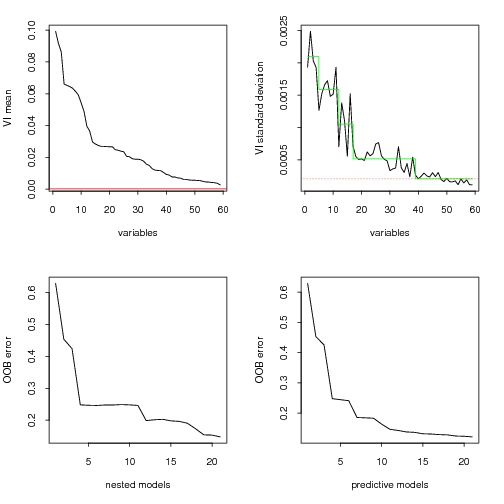

In [291]:
## Display graphs
import wand
from wand.image import Image as WImage
img = WImage(filename=outputgraph)
img

### Prepare .csv for classification (training set and object to classify)

In [155]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

#### Export training set as .csv

In [156]:
### Set if all feature have to be used (vsurfonly=False) 
### or only those resulting from prediction step of VSURF (vsurfonly=True)
vsurfonly=False

In [157]:
## Save list of features to be used 
if vsurfonly:
    features_for_classif=Surf_pred_features
else:
    features_for_classif=list(features.columns.values)[1:]

In [158]:
','.join(features_for_classif)

'area,perimeter,compact_circle,compact_square,fd,opt_blue_min,opt_blue_max,opt_blue_range,opt_blue_mean,opt_blue_stddev,opt_blue_median,opt_blue_first_quart,opt_blue_third_quart,opt_blue_perc_90,opt_green_min,opt_green_max,opt_green_range,opt_green_mean,opt_green_stddev,opt_green_median,opt_green_first_quart,opt_green_third_quart,opt_green_perc_90,opt_red_min,opt_red_max,opt_red_range,opt_red_mean,opt_red_stddev,opt_red_median,opt_red_first_quart,opt_red_third_quart,opt_red_perc_90,opt_nir_min,opt_nir_max,opt_nir_range,opt_nir_mean,opt_nir_stddev,opt_nir_median,opt_nir_first_quart,opt_nir_third_quart,opt_nir_perc_90,ndsm_min,ndsm_max,ndsm_range,ndsm_mean,ndsm_stddev,ndsm_median,ndsm_first_quart,ndsm_third_quart,ndsm_perc_90,ndvi_min,ndvi_max,ndvi_range,ndvi_mean,ndvi_stddev,ndvi_median,ndvi_first_quart,ndvi_third_quart,ndvi_perc_90,ndwi_min,ndwi_max,ndwi_range,ndwi_mean,ndwi_stddev,ndwi_median,ndwi_first_quart,ndwi_third_quart,ndwi_perc_90,ssi_min,ssi_max,ssi_range,ssi_mean,ssi_stddev,

In [159]:
## Define the path to the .csv
training_csv=os.path.join(outputfolder,mapsetname+"_training_csv.csv")

In [138]:
#### Export as .csv
# Query
query="COPY (\
SELECT seg_id, class_num, "+", ".join(features_for_classif)+" \
FROM "+schema+"."+sample_stats+") TO '"+training_csv+"' DELIMITER ',' CSV HEADER"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

#### Export objects statistics as .csv

In [113]:
## Evalutate the number of row in 'object_stat' table
query="SELECT reltuples::bigint AS estimated_object \
FROM pg_class \
WHERE oid='"+schema+"."+object_stats_table+"'::regclass"  
# Execute query through panda
df=pd.read_sql(query, db)
# Save estimated number of objects
estimate=list(df['estimated_object'])[0]
# Print
print "The table contains "+str(estimate)+" rows (estimate)."

The table contains 3110693 rows (estimate).


In [139]:
# Define number of object to classify on each loop
nbobjloop=1000000
# Add 10% of estimated number of rows to be sure to well cover the full dataset 
remaining_rows=int(estimate*1.05)
# Define number of loops for classification
import math
loops=int(math.ceil(remaining_rows/(nbobjloop*1.0)))
## Print what is going to happend
print "Classification will be made on "+str(loops)+" loop(s)"

Classification will be made on 4 loop(s)


In [153]:
# Define starting offset and limit (for the firsth loop)
offset=0
# Declare an empty list containing the paths to .csv
list_objstat_csv=[]
# Export object statistics on multiple .csv files
for loop in range(loops):
    ## Define the path to the .csv
    objstat_csv=os.path.join(outputfolder,"objects_stats_"+str(loop+1)+".csv")
    list_objstat_csv.append(objstat_csv)        
    # Query to export as .csv
    query="COPY (\
    SELECT cat, "+", ".join(features_for_classif)+" \
    FROM "+schema+"."+object_stats_table+"\
    ORDER BY cat \
    OFFSET "+str(offset)+" LIMIT "+str(nbobjloop)+") TO '"+objstat_csv+"' DELIMITER ',' CSV HEADER"
    # Execute the CREATE TABLE query 
    cur.execute(query)  
    # Print
    print "Rows between "+str(offset)+" and "+str(offset+nbobjloop)+" exported in .csv file '"+objstat_csv+"'"
    # Update offset and limit 
    offset+=nbobjloop

Rows between 0 and 1000000 exported in .csv file '/media/tais/data/MAUPP/Articles/SPIE_RemoteSensing2017/Grippa/Results/C_CLASSIF/classif/objects_stats_1.csv'
Rows between 1000000 and 2000000 exported in .csv file '/media/tais/data/MAUPP/Articles/SPIE_RemoteSensing2017/Grippa/Results/C_CLASSIF/classif/objects_stats_2.csv'
Rows between 2000000 and 3000000 exported in .csv file '/media/tais/data/MAUPP/Articles/SPIE_RemoteSensing2017/Grippa/Results/C_CLASSIF/classif/objects_stats_3.csv'
Rows between 3000000 and 4000000 exported in .csv file '/media/tais/data/MAUPP/Articles/SPIE_RemoteSensing2017/Grippa/Results/C_CLASSIF/classif/objects_stats_4.csv'


In [154]:
# Close cursor and communication with the database
cur.close()
db.close()

<center> <font size=5> <h1>Classification using Random Forest</h1> </font> </center>  

In [160]:
%%R 

# Install package
if(!is.element('caret', installed.packages()[,1])){
  cat('\n\nInstalling caret package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('caret')}
# Install package
if(!is.element('randomForest', installed.packages()[,1])){
  cat('\n\nInstalling randomForest package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('randomForest')}
# Install package
if(!is.element('pROC', installed.packages()[,1])){
  cat('\n\nInstalling pROC package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('pROC')}
# Install package
if(!is.element('e1071', installed.packages()[,1])){
  cat('\n\nInstalling e1071 package from CRAN')
  chooseCRANmirror(ind=1)
  install.packages('e1071')}

In [161]:
%%R 

# Load libraries
library(parallel)
require(parallel)
library(doParallel)
require(doParallel)
library(caret)
require(caret)
library(randomForest)
require(randomForest)
library(e1071)
require(e1071)

# Set number of cores to use
usedcores=detectCores()-10
registerDoParallel(usedcores)

## Train Random Forest model

In [162]:
## Set the path to the output of random forest classification
output_accuracy=os.path.join(outputfolder,mapsetname+"_accuracy_RF.csv")

In [163]:
%%R -i training_csv,output_accuracy

# Import training
training <- read.csv(training_csv, sep=",", header=TRUE, row.names=1)
# Define factor
training$class_num <- as.factor(training$class_num)

# Cross-validation setting
MyFolds.cv <- createMultiFolds(training$class_num, k=5, times=10)
MyControl.cv <- trainControl(method='repeatedCV', index=MyFolds.cv, allowParallel = TRUE)

# Train Random Forest
rfModel <- train(class_num~.,training,method='rf', trControl=MyControl.cv,tuneLength=10)
resamps.cv <- rfModel$resample
accuracy_means <- mean(resamps.cv$Accuracy)
kappa_means <- mean(resamps.cv$Kappa)
df_means <- data.frame(method='rf',accuracy=accuracy_means, kappa=kappa_means)
write.csv(df_means, output_accuracy, row.names=FALSE, quote=FALSE)

In [164]:
#### Show mean accuracy results from cross-validation for tuning
## Import .csv file
accuracy=pd.read_csv(output_accuracy, sep=',',header=0)
## Display table
accuracy.head(15)

,method,accuracy,kappa
0,rf,0.86407,0.847765


In [165]:
## Set the path to the output of random forest classification
output_varimp=os.path.join(outputfolder,mapsetname+"_VariablesImportance_RF.pdf")
output_rfmodel=os.path.join(outputfolder,mapsetname+"_RF_model.txt")
output_cv=os.path.join(outputfolder,mapsetname+"_RF_cv.pdf")

In [166]:
%%R -i output_varimp,output_rfmodel,output_cv

# Plot variable importance
library(pROC)
importance <- varImp(rfModel, scale=FALSE)
pdf(output_varimp, width = 11, height = ncol(features)/6 )
print(plot(importance))
dev.off()

# Show final model
tmp<-rfModel$finalModel
sink(output_rfmodel)
print(tmp)
sink()

# Plot cross validation tuning results
pdf(output_cv)
print(plot(rfModel))
dev.off()

png 
  2 


In [167]:
#### Import classifiers tuning parameters and confusion matrix
## Open file
classifier_runs = open(output_rfmodel, 'r')  
## Read file
print classifier_runs.read()


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 12.73%
Confusion matrix:
    11 13 14 21 22 31 32 33 34 41 51 class.error
11 191  0  2  4  1  0  2  0  1  0  1  0.05445545
13   0 71  0  0  0  0  0  0  0  0  1  0.01388889
14   0  0 62  1  0  0  0  0  0  0  0  0.01587302
21   2  0  2 58  7  0  2  0  0  0  0  0.18309859
22   1  0  0  7 57  0  6  1  0  1  0  0.21917808
31   0  0  0  0  0 86  0  0  9  0  0  0.09473684
32   0  0  0  0  6  0 70 11  4  0  0  0.23076923
33   0  0  1  1  0  0 14 45  4  0  0  0.30769231
34   0  0  0  0  0 10  6  4 58  0  0  0.25641026
41   3  0  0  0  0  0  3  0  1 63  2  0.12500000
51   0  0  0  0  0  0  0  1  0  0 75  0.01315789



The following cell display pdf figures. Please first install the **Wand** package using the folowwing command in the terminal : 

``` sudo pip instal Wand ```

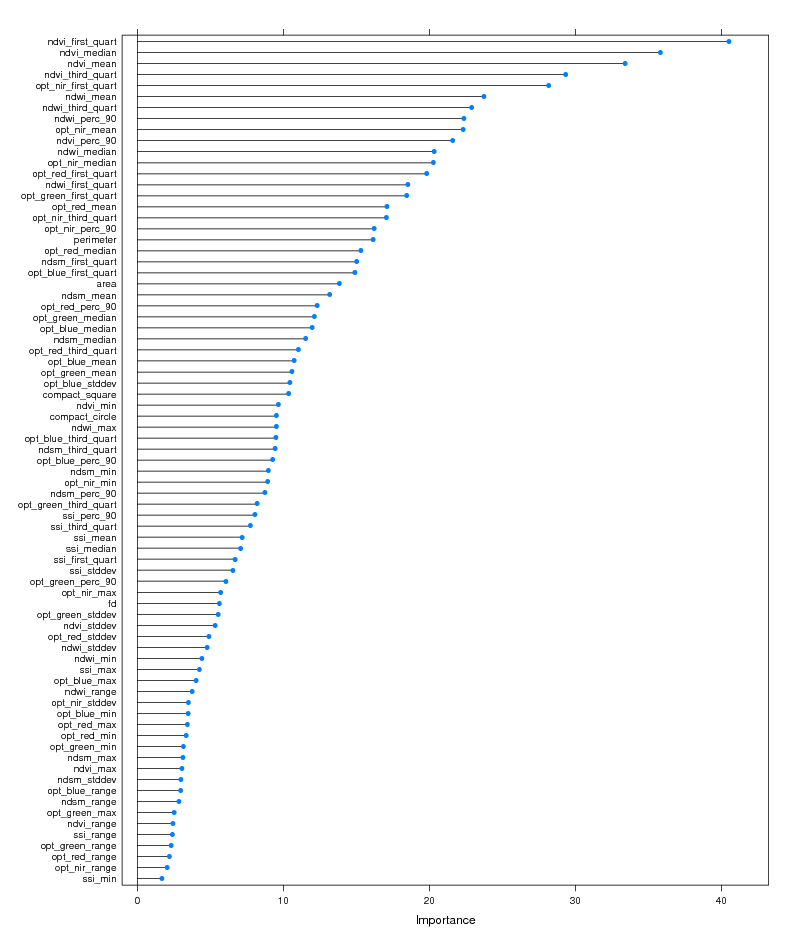

In [168]:
## Display graphs
import wand
from wand.image import Image as WImage
img = WImage(filename=output_varimp)
img

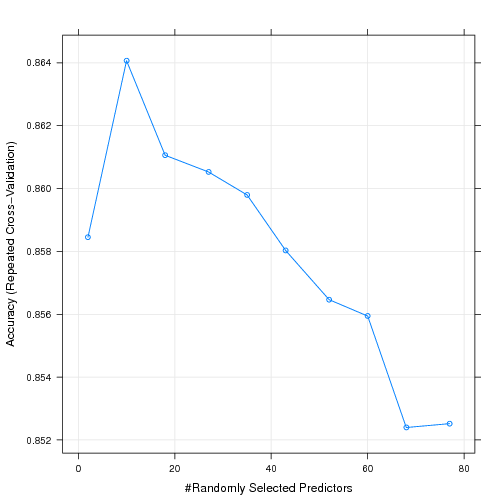

In [169]:
## Display graphs
import wand
from wand.image import Image as WImage
img = WImage(filename=output_cv)
img

## Predict classes for objects

In [239]:
%%R -i list_objstat_csv

# Classification using loop
for(i in 1:length(list_objstat_csv)) {
    filepath<-list_objstat_csv[i]
    # Import object statistics as dataframe
    features <- read.csv(filepath, sep=",", header=TRUE, row.names=1)
    # Predict class 
    predicted <- data.frame(predict(rfModel, features))
    name<-paste('resultsdf',i,sep='')
    assign(name,data.frame(id=rownames(features), predicted))
    rm(features)
    rm(predicted)
    gc()
}

In [240]:
%%R

# Merge predictions in one single dataframe
listdf<-lapply(ls(pattern = "resultsdf*"), get)
rf_predictions<-do.call(rbind,listdf)

### Save training set and predictions in .csv files

In [243]:
## Define outputfile for .csv with training data for R
trainingset_R=os.path.join(outputfolder,mapsetname+"_trainingset_R.csv")
## Define outputfile for .csv with predictions of classification
classif_results=os.path.join(outputfolder,mapsetname+"_RF_classif_results.csv")

In [244]:
%%R -i trainingset_R,classif_results
write.csv(training, file=trainingset_R, row.names=FALSE, quote=FALSE)
write.csv(rf_predictions, file=classif_results, row.names=FALSE, quote=FALSE)

In [246]:
%%R 

# Remove variables not needed anymore
rm(training)
gc()

rm(list=ls(pattern = "resultsdf*"))
rm(listdf)
gc()

           used  (Mb) gc trigger  (Mb)  max used   (Mb)
Ncells  4864010 259.8   14247296 760.9  21335626 1139.5
Vcells 29030513 221.5  130443350 995.3 519391211 3962.7


<center> <font size=3> <h2>Import classification results in postgis </h2> </font> </center>  

In [262]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [268]:
# Drop table if exists:
cur.execute("DROP TABLE IF EXISTS "+schema+"."+classif)
# Make the changes to the database persistent
db.commit()

# Create new table
query="CREATE TABLE "+schema+"."+classif+" (seg_id integer PRIMARY KEY, RF_pred integer)"
# Execute the CREATE TABLE query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

# Create query for copy data from csv
query="COPY "+schema+"."+classif+" FROM '"+str(classif_results)+"' HEADER DELIMITER ',' CSV" 
# Execute the COPY FROM CSV query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()    

In [269]:
# Close cursor and communication with the database
cur.close()
db.close()

<center> <font size=3> <h2>Accuracy assesment</h2> </font> </center>  

### Change the outputfolder

In [24]:
## Folder in which save processing time output
outputfolder=os.path.join(resultfolder,mapsetname,"accuracy_assess")

## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

## Join sample test and classifier predictions in postgresql

In [25]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [26]:
# Build a query to drop view if exists
query="DROP TABLE IF EXISTS "+schema+"."+groundtruth_classif
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [27]:
#### Join sample_test and classification results
query="CREATE TABLE "+schema+"."+groundtruth_classif+" AS (\
SELECT a.id, a.class_num AS level2_groundtr, a.class AS level2_label, c.rf_pred AS rf_level2 \
FROM "+schema+"."+sample_test+" AS a \
LEFT JOIN "+schema+"."+classif+" AS c ON a.seg_id = c.seg_id)"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [28]:
## Add column for prediction at level 2 + label of level 2 classes
query="ALTER TABLE "+schema+"."+groundtruth_classif+" \
ADD COLUMN level1_groundtr integer, \
ADD COLUMN level1_label text, \
ADD COLUMN rf_level1 integer"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [29]:
## Update column for prediction and ground truth at level 2 
query="UPDATE "+schema+"."+groundtruth_classif+" \
SET rf_level1=rf_level2/10, level1_groundtr=level2_groundtr/10"
# Execute the query 
cur.execute(query)
# Make the changes to the database persistent
db.commit()

In [58]:
# Setup a dictionnary with label of level 1 classes
level1_dict={}
level1_dict[1]="Artificial surfaces"
level1_dict[2]="Natural material surfaces"
level1_dict[3]="Vegetation"
level1_dict[4]="Water"
level1_dict[5]="Shadows"

In [59]:
## Update column for label of level 2 classes
for classes in level1_dict.keys():
    query="UPDATE "+schema+"."+groundtruth_classif+" \
    SET level1_label='"+level1_dict[classes]+"' WHERE level1_groundtr="+str(classes)
    # Execute the query 
    cur.execute(query)
    # Make the changes to the database persistent
    db.commit()

In [60]:
#### Save ground truth, optical_predic, opticalsar_predic as lists, for Level-1 and Level-2
# Query 
query="SELECT * FROM "+schema+"."+groundtruth_classif+" ORDER BY level2_groundtr"
# Execute query through panda
df=pd.read_sql(query, db)

# Show dataframe
df.head(20)

,id,level2_groundtr,level2_label,rf_level2,level1_groundtr,level1_label,rf_level1
0,510,11,Buildings,11,1,Artificial surfaces,1
1,1048,11,Buildings,11,1,Artificial surfaces,1
2,1080,11,Buildings,34,1,Artificial surfaces,3
3,1127,11,Buildings,11,1,Artificial surfaces,1
4,184,11,Buildings,11,1,Artificial surfaces,1
5,747,11,Buildings,11,1,Artificial surfaces,1
6,722,11,Buildings,11,1,Artificial surfaces,1
7,700,11,Buildings,11,1,Artificial surfaces,1
8,49,11,Buildings,11,1,Artificial surfaces,1
9,613,11,Buildings,11,1,Artificial surfaces,1


In [61]:
# Save ground truth classes labels - Level2
classes_L2=list(df['level2_label'].unique())
# Save ground truth classes labels - Level1
classes_L1=list(df['level1_label'].unique())

In [62]:
print "Level 2 classes:\n"+'\n'.join(classes_L2)
print "\n"
print "Level 1 classes:\n"+'\n'.join(classes_L1)

Level 2 classes:
Buildings
Swimming pools
Asphalt surfaces
Brown/red bare soil
White/grey bare soil
Trees
Mixed bare soil/vegetation
Dry vegetation
Other vegetation
Inland waters
Shadows


Level 1 classes:
Artificial surfaces
Natural material surfaces
Vegetation
Water
Shadows


In [63]:
# Save ground truth - Level2
groundtruth_L2=list(df['level2_groundtr'])
# Save ground truth - Level1
groundtruth_L1=list(df['level1_groundtr'])

# Save predictions - level2
prediction_L2=list(df['rf_level2'])
# Save predictions - level1
prediction_L1=list(df['rf_level1'])

In [64]:
# Display number of objects in test sample
nrows=len(groundtruth_L2)
print nrows

440


<center> <font size=4>  <h2>Confusion matrix</h2> </font> </center>

The classification performance evaluation is made mainly using [Scikit-learn](http://scikit-learn.org/stable/modules/model_evaluation.html).

The trick to plot the confusion matrix was found [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py).

In [65]:
## Import libraries
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
%matplotlib inline  

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, ha='right', rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Level 2

In [67]:
# Compute confusion matrix
cnf_matrix_L2=confusion_matrix(groundtruth_L2, prediction_L2)

In [68]:
## Set the path to the output
output_rowconfmat=os.path.join(outputfolder,mapsetname+"_rowconfusionmatrix_L2.txt")

## Export the row confusion matrix
numpy.savetxt(output_rowconfmat, cnf_matrix_L2.astype(np.int), fmt='%d', delimiter=",")

Confusion matrix, without normalization
Normalized confusion matrix


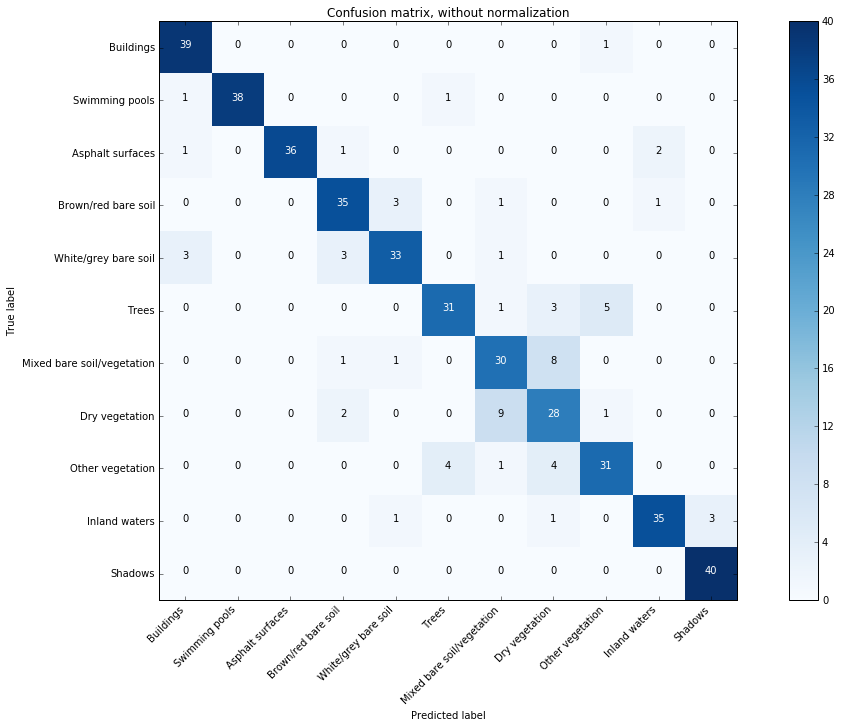

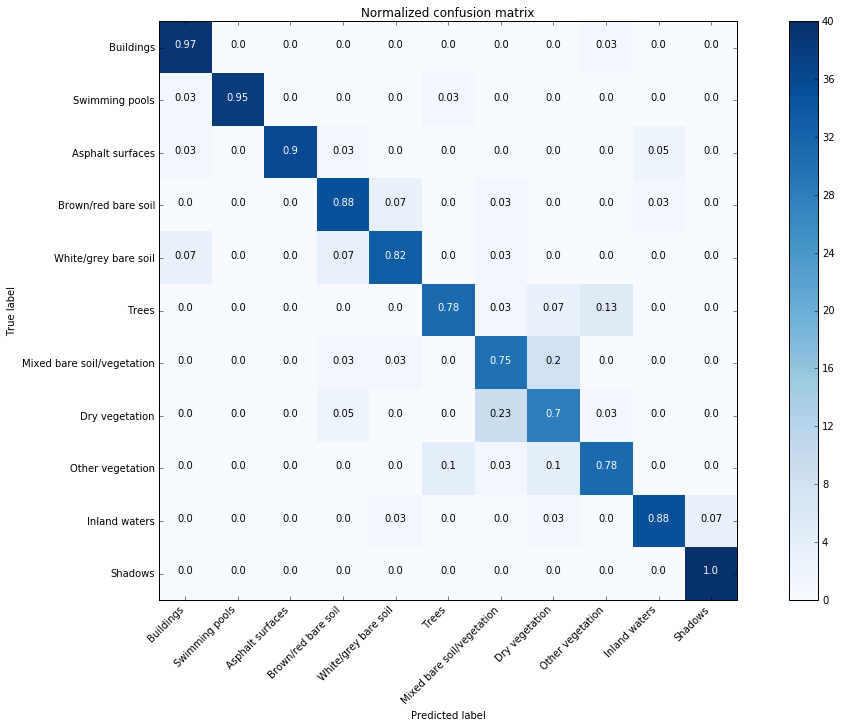

In [69]:
# Plot non-normalized confusion matrix
fig_cm=plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_L2, classes=classes_L2,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fig_cm_normal=plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_L2, classes=classes_L2, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [70]:
## Set the path to the output
output_confmat_pdf=os.path.join(outputfolder,mapsetname+"_confusionmatrix_L2.pdf")
output_confmatA_png=os.path.join(outputfolder,mapsetname+"_confusionmatrixA_L2.png")
output_confmatB_png=os.path.join(outputfolder,mapsetname+"_confusionmatrixB_L2.png")

In [71]:
# Export in PDF
from matplotlib.backends.backend_pdf import PdfPages
pp=PdfPages(output_confmat_pdf)
pp.savefig(fig_cm)
pp.savefig(fig_cm_normal)
pp.close()

# Export in PNG
fig_cm.savefig(output_confmatA_png, format='png', dpi=300)
fig_cm_normal.savefig(output_confmatB_png, format='png', dpi=300)

### Level 1

In [72]:
# Compute confusion matrix
cnf_matrix_L1=confusion_matrix(groundtruth_L1, prediction_L1)

In [73]:
## Set the path to the output
output_rowconfmat=os.path.join(outputfolder,mapsetname+"_rowconfusionmatrix_L1.txt")

## Export the row confusion matrix
numpy.savetxt(output_rowconfmat, cnf_matrix_L1.astype(np.int), fmt='%d', delimiter=",")

Confusion matrix, without normalization
Normalized confusion matrix


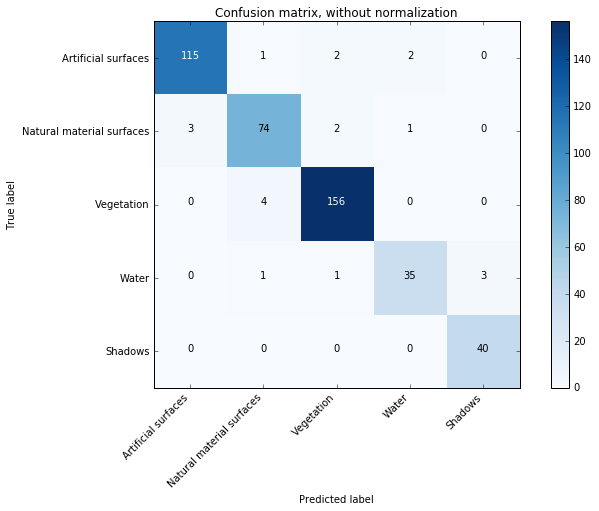

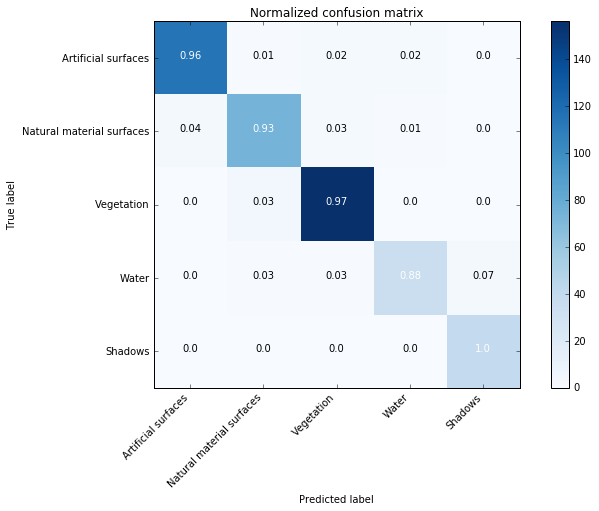

In [74]:
# Plot non-normalized confusion matrix
fig_cm=plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix_L1, classes=classes_L1,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fig_cm_normal=plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix_L1, classes=classes_L1, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [75]:
## Set the path to the output
output_confmat_pdf=os.path.join(outputfolder,mapsetname+"_confusionmatrix_L1.pdf")
output_confmatA_png=os.path.join(outputfolder,mapsetname+"_confusionmatrixA_L1.png")
output_confmatB_png=os.path.join(outputfolder,mapsetname+"_confusionmatrixB_L1.png")

In [76]:
# Export in PDF
from matplotlib.backends.backend_pdf import PdfPages
pp=PdfPages(output_confmat_pdf)
pp.savefig(fig_cm)
pp.savefig(fig_cm_normal)
pp.close()

# Export in PNG
fig_cm.savefig(output_confmatA_png, format='png', dpi=300)
fig_cm_normal.savefig(output_confmatB_png, format='png', dpi=300)

<center> <font size=4>  <h2>Accuracy measures</h2> </font> </center>

## Classification report

TODO: Find a way to compute comission and omission errore / User's Producers' accuracies

In [77]:
## Import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

#### Level 2

In [78]:
## Set the path to the output
output=os.path.join(outputfolder,mapsetname+"_RF_classif_repport_L2.txt")

In [79]:
# Define dataset to take into account
y_true=groundtruth_L2
y_pred=prediction_L2
class_label=classes_L2

# Compute precision accuracy
accuracy=accuracy_score(y_true, y_pred, normalize=True)
# Compute Cohen's Kappa
cohen_kappa=cohen_kappa_score(y_true, y_pred)
# Compute f1-score
f_1=f1_score(y_true, y_pred, average='weighted')
# Compute 'classification report'
classif_report=classification_report(y_true, y_pred, target_names=class_label)

# Save as .txt file
f=open(output, 'w')
f.write("Performance evalutation: \n")
f.write("Overall Accuracy: "+str(accuracy)+"\n")
f.write("Cohen's Kappa: "+str(cohen_kappa)+"\n")
f.write("F1-score: "+str(f_1)+"\n")
f.write("\n\n")
f.write("Classification report: \n "+classif_report)
f.close()

# Show file content
f=open(output,'r')
file_contents=f.read()
print (file_contents)
f.close()

Performance evalutation: 
Overall Accuracy: 0.854545454545
Cohen's Kappa: 0.84
F1-score: 0.855602002485


Classification report: 
                             precision    recall  f1-score   support

                 Buildings       0.89      0.97      0.93        40
            Swimming pools       1.00      0.95      0.97        40
          Asphalt surfaces       1.00      0.90      0.95        40
       Brown/red bare soil       0.83      0.88      0.85        40
      White/grey bare soil       0.87      0.82      0.85        40
                     Trees       0.86      0.78      0.82        40
Mixed bare soil/vegetation       0.70      0.75      0.72        40
            Dry vegetation       0.64      0.70      0.67        40
          Other vegetation       0.82      0.78      0.79        40
             Inland waters       0.92      0.88      0.90        40
                   Shadows       0.93      1.00      0.96        40

               avg / total       0.86      0.85    

#### Level 1

In [80]:
## Set the path to the output
output=os.path.join(outputfolder,mapsetname+"_RF_classif_repport_L1.txt")

In [81]:
# Define dataset to take into account
y_true=groundtruth_L1
y_pred=prediction_L1
class_label=classes_L1

# Compute precision accuracy
accuracy=accuracy_score(y_true, y_pred, normalize=True)
# Compute Cohen's Kappa
cohen_kappa=cohen_kappa_score(y_true, y_pred)
# Compute f1-score
f_1=f1_score(y_true, y_pred, average='weighted')
# Compute 'classification report'
classif_report=classification_report(y_true, y_pred, target_names=class_label)

# Save as .txt file
f=open(output, 'w')
f.write("Performance evalutation: \n")
f.write("Overall Accuracy: "+str(accuracy)+"\n")
f.write("Cohen's Kappa: "+str(cohen_kappa)+"\n")
f.write("F1-score: "+str(f_1)+"\n")
f.write("\n\n")
f.write("Classification report: \n "+classif_report)
f.close()

# Show file content
f=open(output,'r')
file_contents=f.read()
print (file_contents)
f.close()

Performance evalutation: 
Overall Accuracy: 0.954545454545
Cohen's Kappa: 0.938905859483
F1-score: 0.954391040934


Classification report: 
                            precision    recall  f1-score   support

      Artificial surfaces       0.97      0.96      0.97       120
Natural material surfaces       0.93      0.93      0.93        80
               Vegetation       0.97      0.97      0.97       160
                    Water       0.92      0.88      0.90        40
                  Shadows       0.93      1.00      0.96        40

              avg / total       0.95      0.95      0.95       440



<center> <font size=3> <h2>Reclass segmentation rasters with classification results</h2> </font> </center>  

### Change the outputfolder

In [82]:
## Folder in which save processing time output
outputfolder=os.path.join(resultfolder,mapsetname,"classified_rasters")

## Create the folder if does not exists
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    print "Folder '"+outputfolder+"' created"

Here after, the segment raster will be reclassed (using r.reclass) with the classification results.

In [414]:
# Connect to an existing database
db=pg.connect(database=dbname, user=dbuser, password=dbpassword, host=host)
# Open a cursor to perform database operations
cur=db.cursor()

In [415]:
#### Save 'seg_id' and the corresponding prediction for in a list
# Query
query="SELECT seg_id, rf_pred FROM "+schema+"."+classif
# Execute query through panda
df=pd.read_sql(query, db)

# Save seg_id of objects in a list
listsegid=list(df['seg_id'])
# Save predictions at level_2 in a list
listpredict=list(df['rf_pred'])

# Display number of objects
nrows=len(listsegid)
print nrows

3110699


In [274]:
##### Reclassify raster
## Create a temporary 'reclass_rule.csv' file
temprulecsv=os.path.join(tempfile.gettempdir(),"reclass_rules.csv") # Define the csv output file name
f = open(temprulecsv, 'w')
# Write rules in the csv file
for i in range(0,nrows-1):
    f.write(str(listsegid[i]))
    f.write("=")
    f.write(str(listpredict[i]))
    f.write("\n")
f.write("*")
f.write("=")
f.write("NULL")
f.close()

## Set computational region
grass.run_command('g.region', overwrite=True, raster="segments")
## Reclass segments raster layer to keep only outliers segments, using the reclas_rule.csv file (create temporary raster)
grass.run_command('r.reclass', overwrite=True, input="segments", output="rf_classif", rules=temprulecsv)

## Erase the temporary 'reclass_rule.csv' file
os.remove(temprulecsv)

<center> <font size=3> <h3>Create 'real raster' and export</h3> </font> </center>  

In [276]:
## Display the list of raster available in the current mapset
print grass.read_command('g.list', type="raster", mapset=mapsetname)

rf_classif
segments
zone_morpho



In [277]:
# Create a list with classified raster
classifiedraster_list=grass.list_strings("rast", pattern="rf_classif_*", flag='r')
print classifiedraster_list

['rf_classif@C_CLASSIF']


In [281]:
## Saving current time for processing time management
print ("Making a copy of classified maps in current mapset on " + time.ctime())
begintime_copyraster=time.time()

# Save index for substring (to remove mapset name in the layer's name)
index=len(mapsetname)+1

# Define color table. Replace with the RGB values of wanted colors of each class
color_rule="11  227:26:28"+"\n"
#color_rule+="12  255:141:1"+"\n"
color_rule+="13  94:221:227"+"\n"
color_rule+="14  102:102:102"+"\n"
color_rule+="21  246:194:142"+"\n"
color_rule+="22  211:217:173"+"\n"
color_rule+="31  0:128:0"+"\n"
color_rule+="32  189:255:185"+"\n"
color_rule+="33  88:190:141"+"\n"
color_rule+="34  29:220:0"+"\n"
color_rule+="41  30:30:192"+"\n"
color_rule+="51  0:0:0"+"\n"

## Create a temporary 'color_table.txt' file
color_table=os.path.join(outputfolder,"color_table.txt") # Define the csv output file name
f = open(color_table, 'w')
f.write(color_rule)
f.close()
    
#### Make a copy of the classified maps of faster display in GRASS GIS
for classif in classifiedraster_list:
    ## Set computational region
    grass.run_command('g.region', overwrite=True, raster="segments")

    ## Create the same raster with r.mapcalc
    formula=str(classif[:-index])+"_temp="+str(classif[:-index])
    grass.mapcalc(formula, overwrite=True)
       
    ## Rename the new raster with the name of the original one (will be overwrited)
    renameformula=str(classif[:-10])+"_temp,"+str(classif[:-10])
    grass.run_command('g.rename', overwrite=True, raster=renameformula)
     
    ## Apply new color the existing GRASS colortable (for faster display in GRASS map display)
    grass.run_command('r.colors', map=classif, rules=color_table)
    
## Compute processing time and print it
print_processing_time(begintime_copyraster, "Classified raster maps have been copied in current mapset in ")

Making a copy of classified maps in current mapset on Sat Aug 12 21:24:19 2017


'Classified raster maps have been copied in current mapset in 23.4 seconds'

#### Export of classification raster

In [282]:
## Saving current time for processing time management
print ("Export classified raster maps on " + time.ctime())
begintime_exportraster=time.time()

for classif in classifiedraster_list:
    outputname=os.path.join(outputfolder,str(classif[:-index])+".tif")
    grass.run_command('g.region', overwrite=True, raster=classif)
    grass.run_command('r.out.gdal', overwrite=True, input=classif, output=outputname, format='GTiff')
    
## Compute processing time and print it
print_processing_time(begintime_exportraster, "Classified raster maps exported in ")

Export classified raster maps on Sat Aug 12 21:26:06 2017


'Classified raster maps exported in 15.5 seconds'

In [ ]:
confusion_matrix

<left> <font size=4> <b> End of classification part </b> </font> </left> 

In [ ]:
print("The script ends at "+ time.ctime())
print_processing_time(begintime_segmentation_full, "Entire process has been achieved in ")

**-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-**